In [1]:
# 1. Import and Load Data
# ================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# ML Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             confusion_matrix, classification_report, mean_squared_error, 
                             mean_absolute_error, r2_score)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from scipy import stats

# XGBoost
import xgboost as xgb

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Time Series Libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

import joblib

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv('Gold Price (2013-2023).csv')

print("Dataset loaded successfully!")
print("\n" + "="*80)
print("INITIAL DATA EXPLORATION")
print("="*80)

print("\nFirst 5 rows:")
print(df.head())

print("\n\nDataset Info:")
print(df.info())

print("\n\nStatistical Summary:")
print(df.describe())

print("\n\nDataset Shape:", df.shape)
print("Columns:", df.columns.tolist())


Dataset loaded successfully!

INITIAL DATA EXPLORATION

First 5 rows:
         Date     Price      Open      High       Low     Vol. Change %
0  12/30/2022  1,826.20  1,821.80  1,832.40  1,819.80  107.50K    0.01%
1  12/29/2022  1,826.00  1,812.30  1,827.30  1,811.20  105.99K    0.56%
2  12/28/2022  1,815.80  1,822.40  1,822.80  1,804.20  118.08K   -0.40%
3  12/27/2022  1,823.10  1,808.20  1,841.90  1,808.00  159.62K    0.74%
4  12/26/2022  1,809.70  1,805.80  1,811.95  1,805.55      NaN    0.30%


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2583 entries, 0 to 2582
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2583 non-null   object
 1   Price     2583 non-null   object
 2   Open      2583 non-null   object
 3   High      2583 non-null   object
 4   Low       2583 non-null   object
 5   Vol.      2578 non-null   object
 6   Change %  2583 non-null   object
dtypes: object(7)
memory usage: 14


EXPLORATORY DATA ANALYSIS

Cleaned Data:
        Date   Price    Open    High     Low  Vol.  Change %
0 2013-01-02  1689.9  1675.8  1695.0  1672.1  0.06      0.78
1 2013-01-03  1675.6  1688.0  1689.3  1664.3  0.19     -0.85
2 2013-01-04  1649.9  1664.4  1664.4  1630.0  0.31     -1.53
3 2013-01-07  1647.2  1657.3  1663.8  1645.3  0.09     -0.16
4 2013-01-08  1663.2  1651.5  1662.6  1648.8  0.13      0.97

TIME SERIES ANALYSIS

1. Decomposing Time Series...


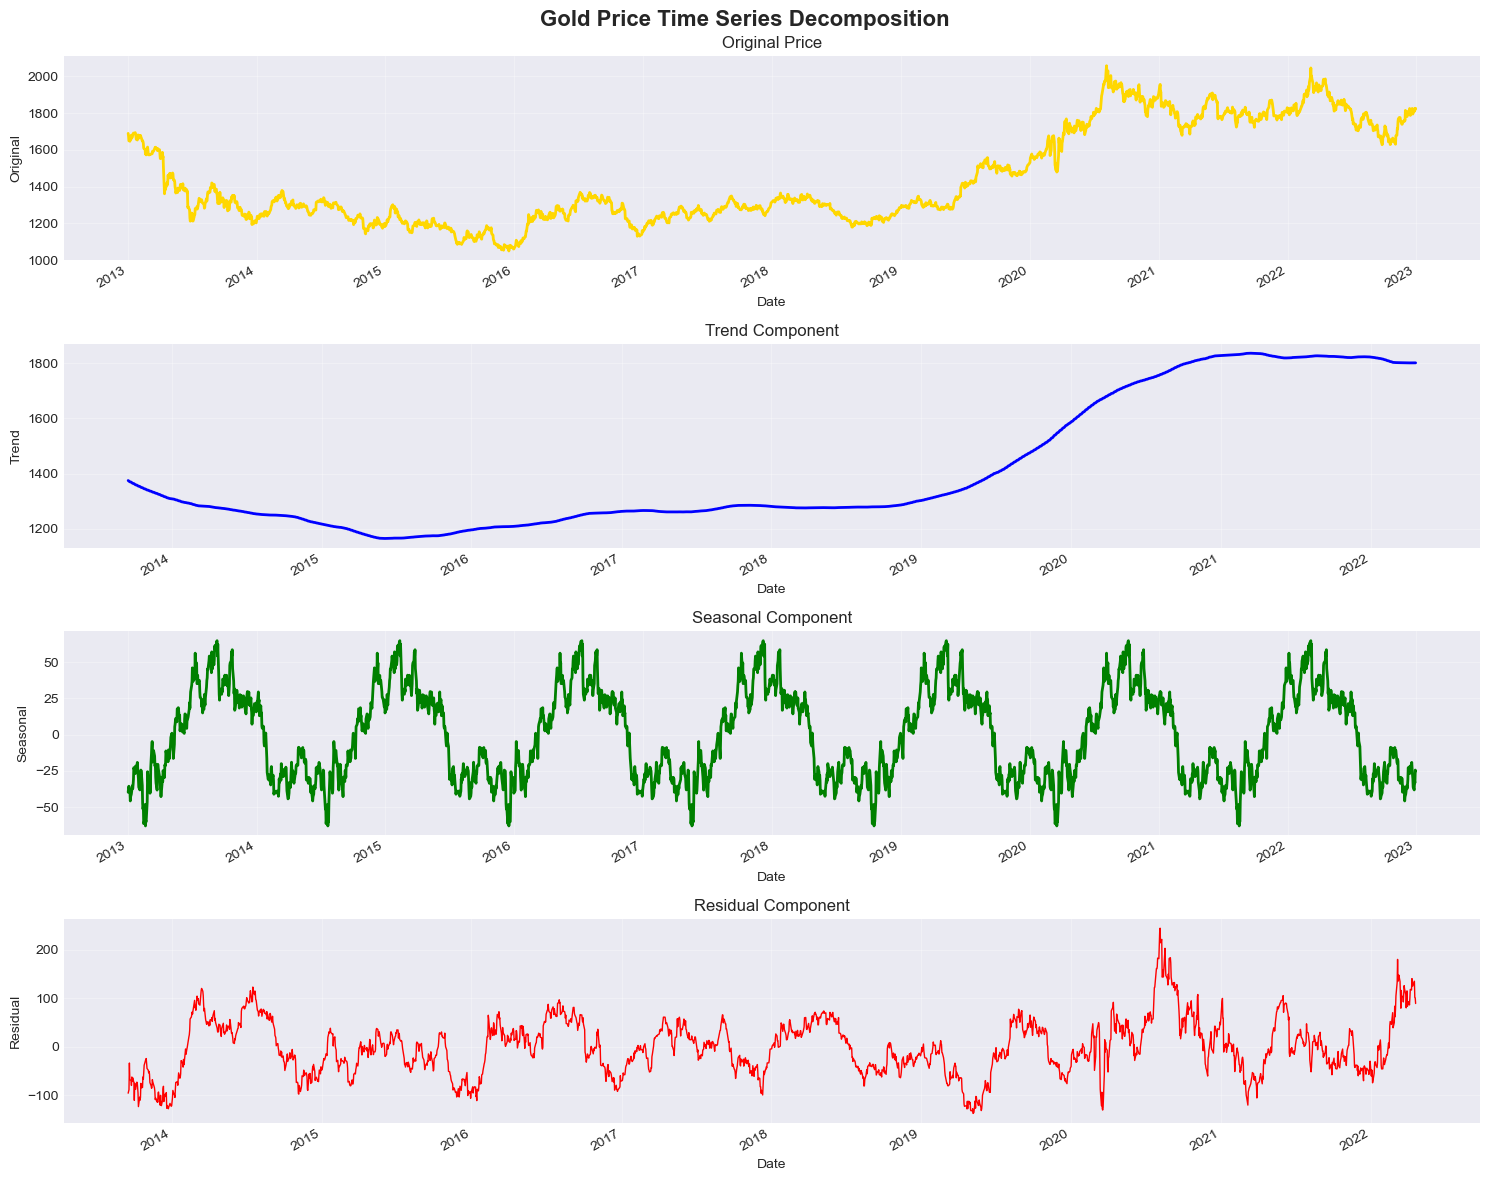


2. Testing for Stationarity (ADF Test)...
ADF Statistic: -0.977917
p-value: 0.761233
Critical Values:
  1%: -3.433
  5%: -2.863
  10%: -2.567
✗ Series is non-stationary (fail to reject H0)

3. Plotting ACF and PACF...


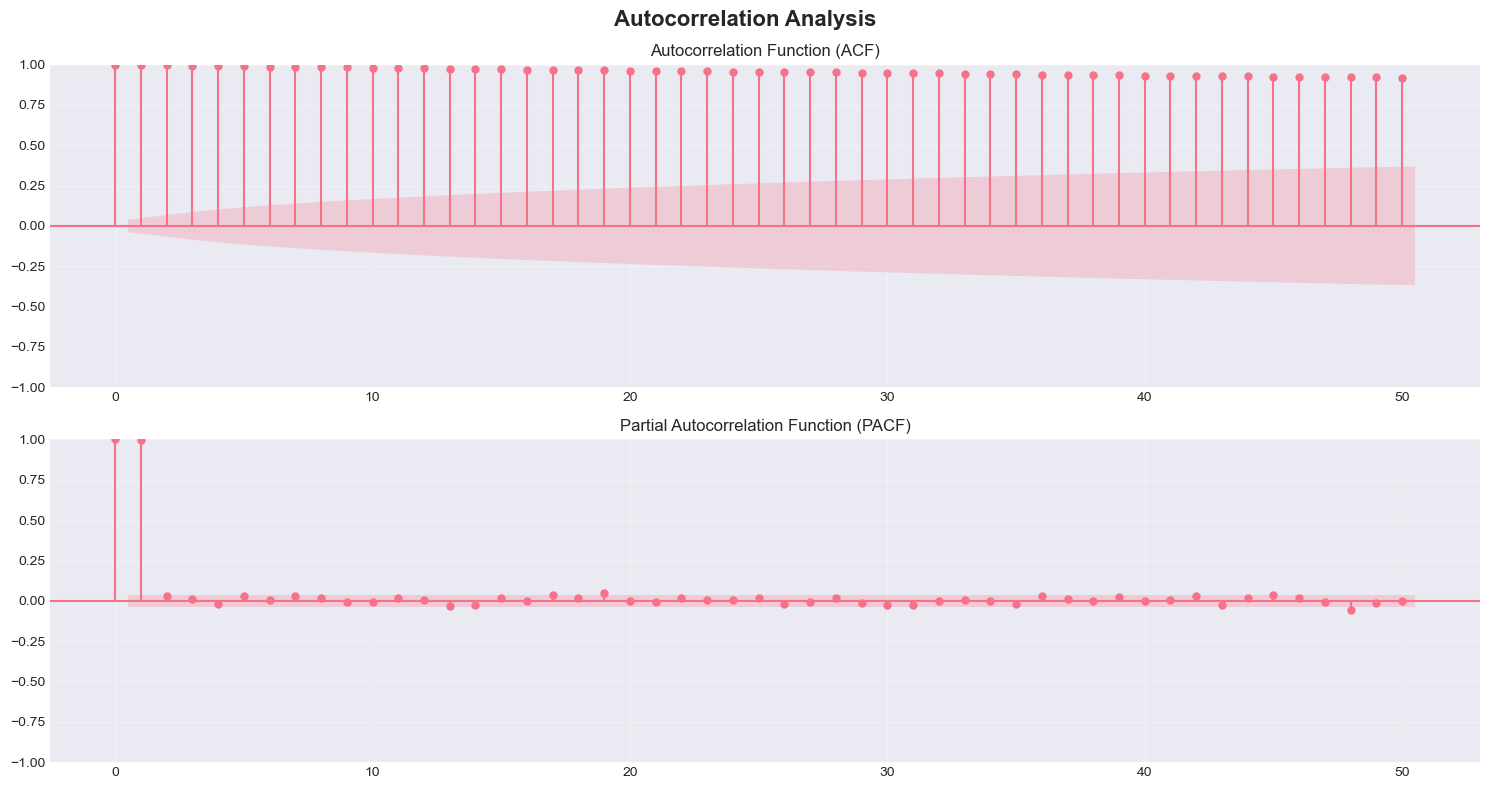


4. Calculating Rolling Statistics...


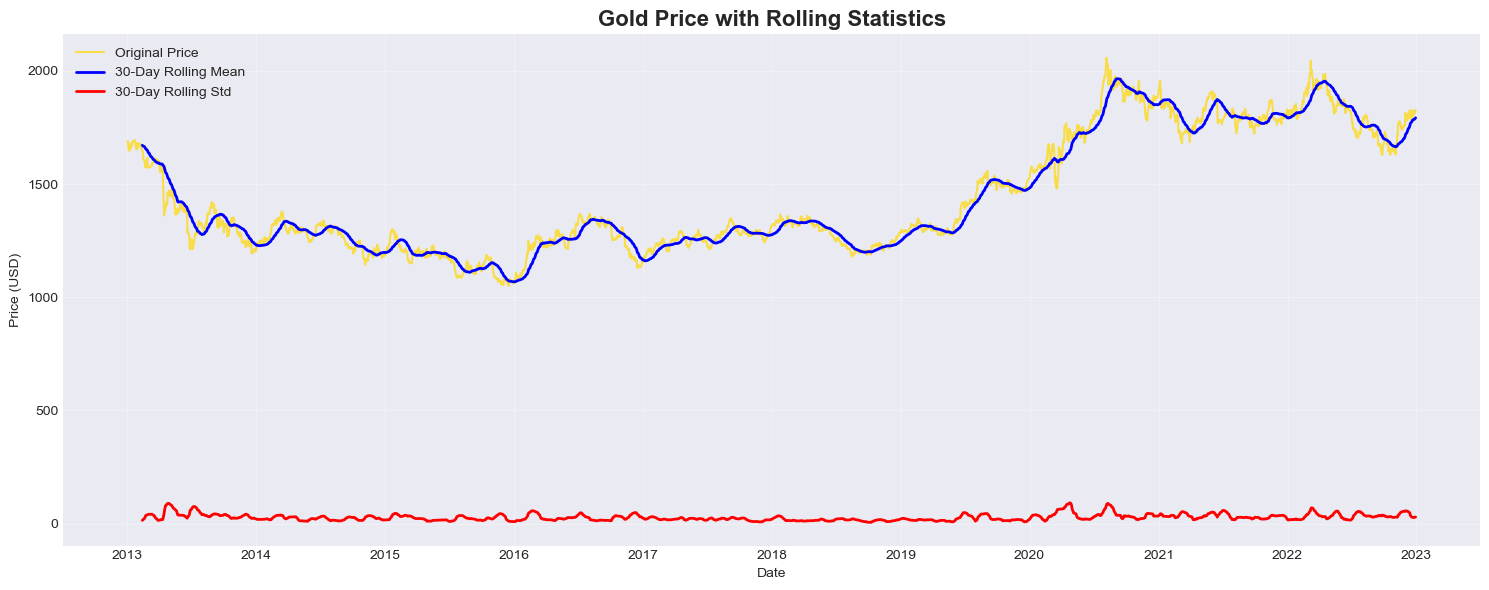


5. Training ARIMA Model...


d:\Software\python_3.12_Latest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Software\python_3.12_Latest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Software\python_3.12_Latest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 2066
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -8372.173
Date:                Wed, 14 Jan 2026   AIC                          16754.347
Time:                        19:25:58   BIC                          16782.511
Sample:                             0   HQIC                         16764.671
                               - 2066                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6896      0.085      8.098      0.000       0.523       0.856
ar.L2         -0.8134      0.113     -7.199      0.000      -1.035      -0.592
ma.L1         -0.7030      0.0

d:\Software\python_3.12_Latest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


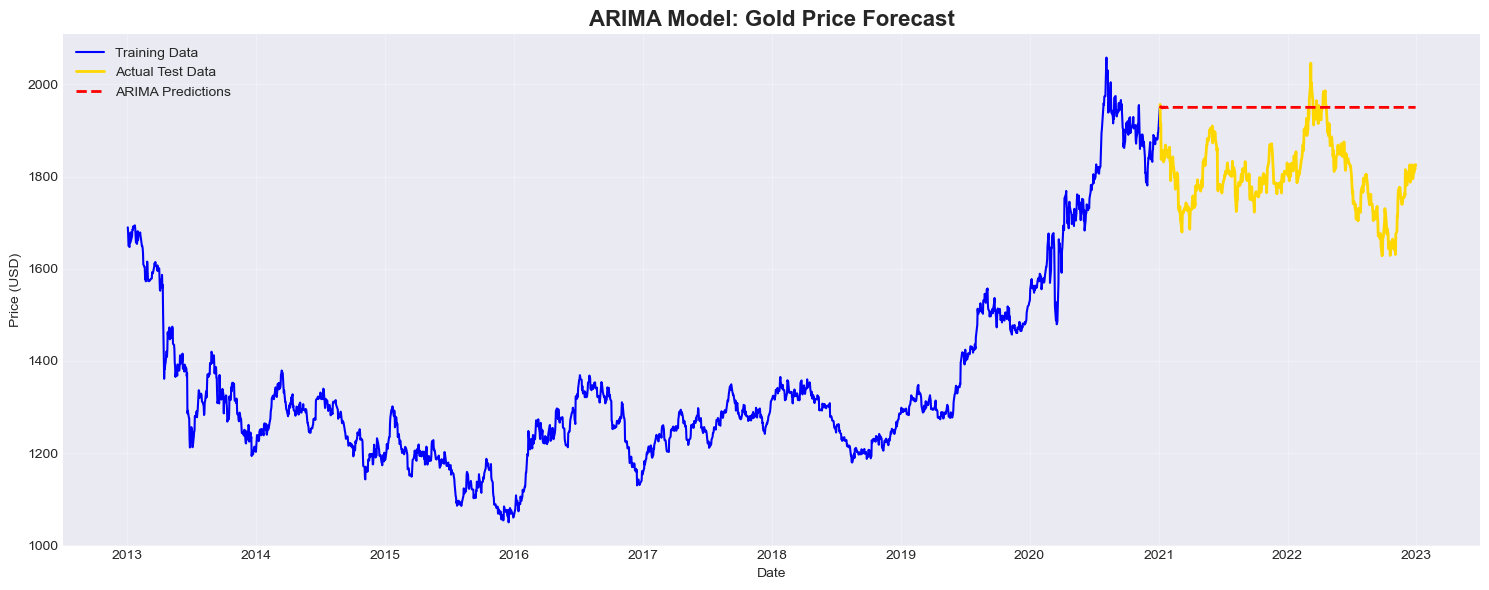


6. Training Exponential Smoothing Model...


d:\Software\python_3.12_Latest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Software\python_3.12_Latest\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(



Exponential Smoothing Model Performance:
MAE: 2885.13
RMSE: 3301.78
R² Score: -2036.4663


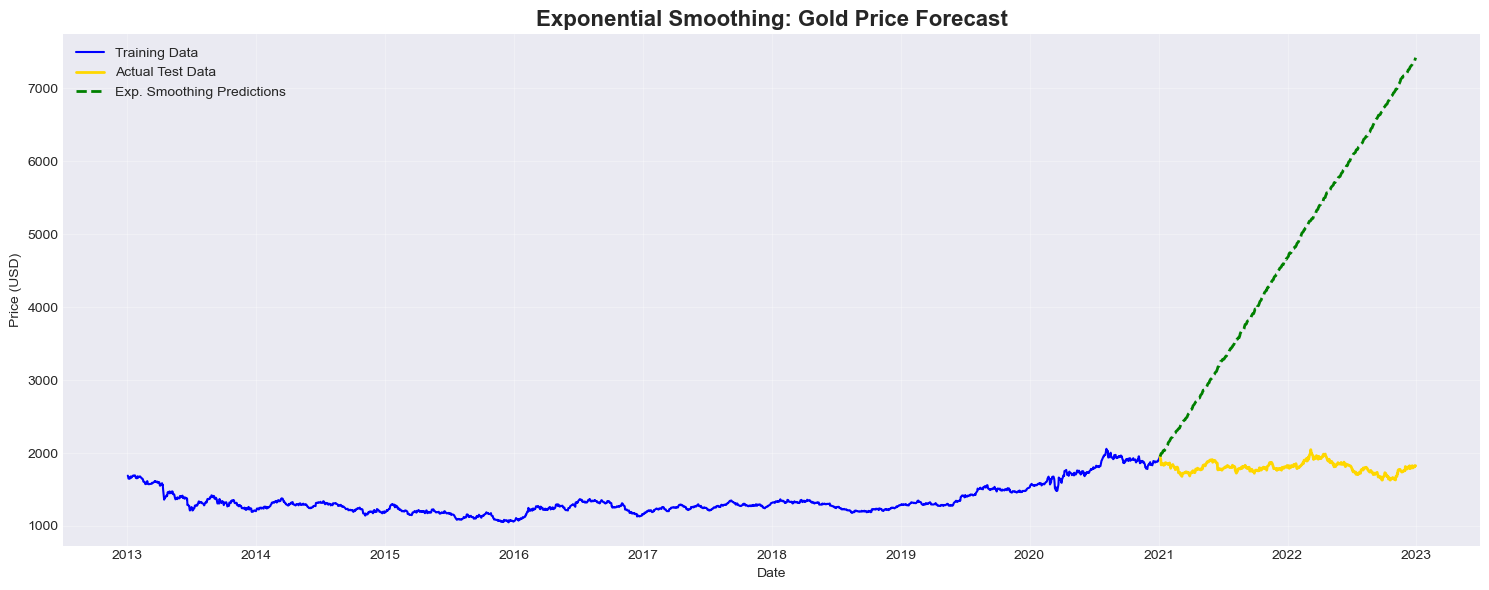


7. Training Time Series Regression Models...

Training Random Forest Regressor...
  MAE: 15.68
  RMSE: 22.09
  R² Score: 0.9151

Training Gradient Boosting Regressor...
  MAE: 16.09
  RMSE: 22.04
  R² Score: 0.9155

Training SVR...
  MAE: 159.33
  RMSE: 178.24
  R² Score: -4.5300


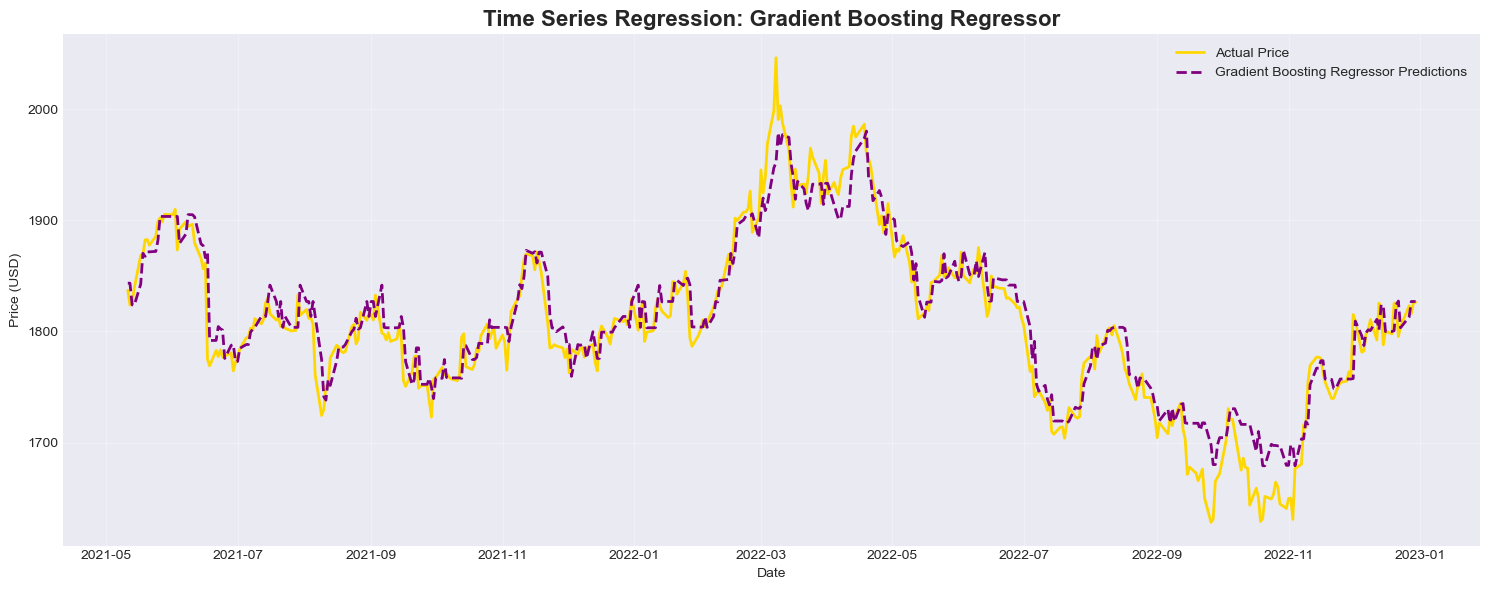


8. Creating Advanced Time Series Features...

Creating advanced features...
  - Adding lag features...
  - Adding rolling statistics...
  - Adding momentum features...
  - Adding exponential moving averages...
  - Adding trend features...
  - Adding seasonality features...
  - Adding technical indicators...
  - Adding Bollinger Bands...
  - Adding RSI...
  - Adding autocorrelation features...

✓ Created 91 total features
✓ Original shape: (2583, 6), New shape: (2583, 91)

Final feature matrix shape after removing NaN: (2405, 91)

Total features for modeling: 85

Feature categories:
  Lag features: 10
  Rolling statistics: 37
  Momentum features: 12
  Trend features: 4
  Seasonality features: 11
  Technical indicators: 22

Advanced Training set: (1924, 85)
Advanced Test set: (481, 85)

✓ Advanced scaler saved as: scaler_advanced.pkl
✓ Advanced feature columns saved as: feature_columns_advanced.pkl

9. Training Random Forest with Basic Features...

Training Random Forest Regressor...
  

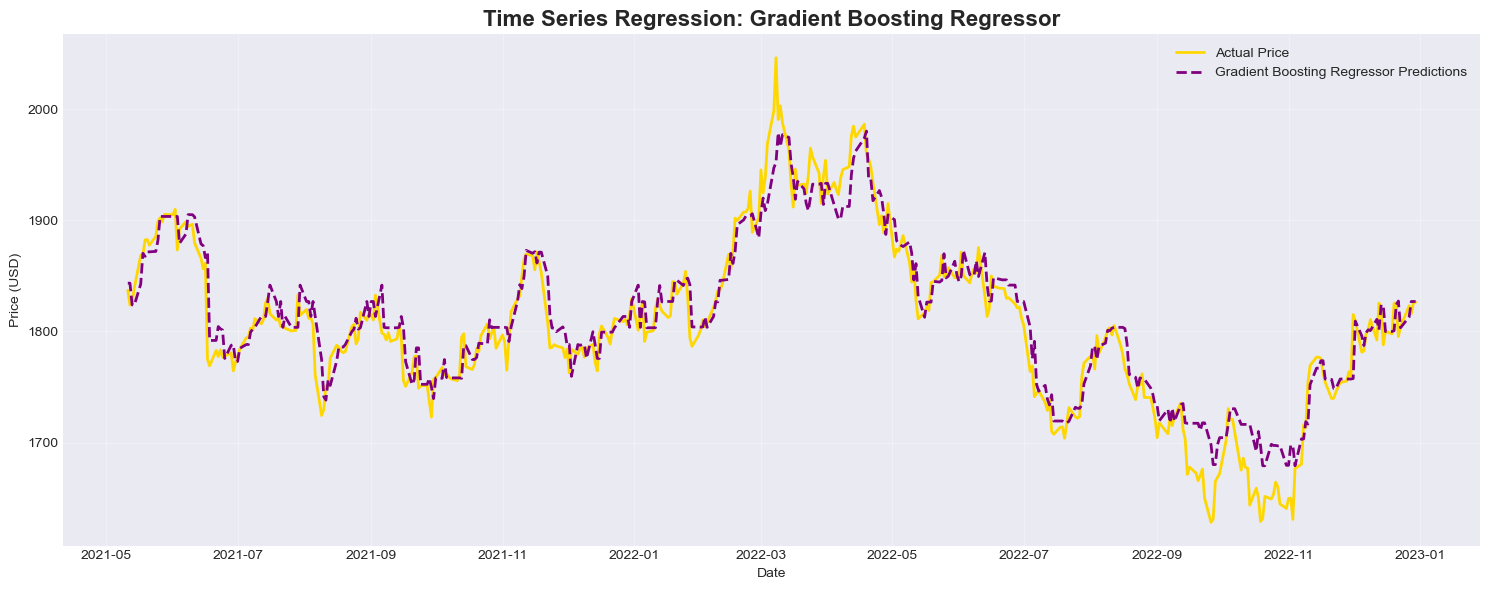


10. Training Advanced Random Forest Regressor...

Random Forest feature matrix shape: (2548, 13)
Features used: ['Days_Since_Start', 'Price_Lag1', 'Price_Lag7', 'Price_Lag30', 'Price_MA_7', 'Price_MA_30', 'Price_Std_7', 'Price_Momentum', 'Price_Range', 'DayOfWeek', 'Month', 'Quarter', 'Year']

RF Training set: (2038, 13)
RF Test set: (510, 13)

Training optimized Random Forest Regressor...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished



RANDOM FOREST REGRESSOR PERFORMANCE

Training Metrics:
  MAE: 3.87
  RMSE: 6.03
  R² Score: 0.9991

Test Metrics:
  MAE: 36.10
  RMSE: 42.64
  R² Score: 0.6568

⚠️  Warning: Possible overfitting detected (R² diff: 0.3423)

Feature Importance Analysis:

Top 10 Most Important Features:
         Feature  Importance
      Price_Lag1    0.257658
      Price_MA_7    0.189795
      Price_Lag7    0.155515
     Price_MA_30    0.153818
Days_Since_Start    0.098886
     Price_Lag30    0.062398
            Year    0.062379
     Price_Range    0.005769
           Month    0.004220
     Price_Std_7    0.003560


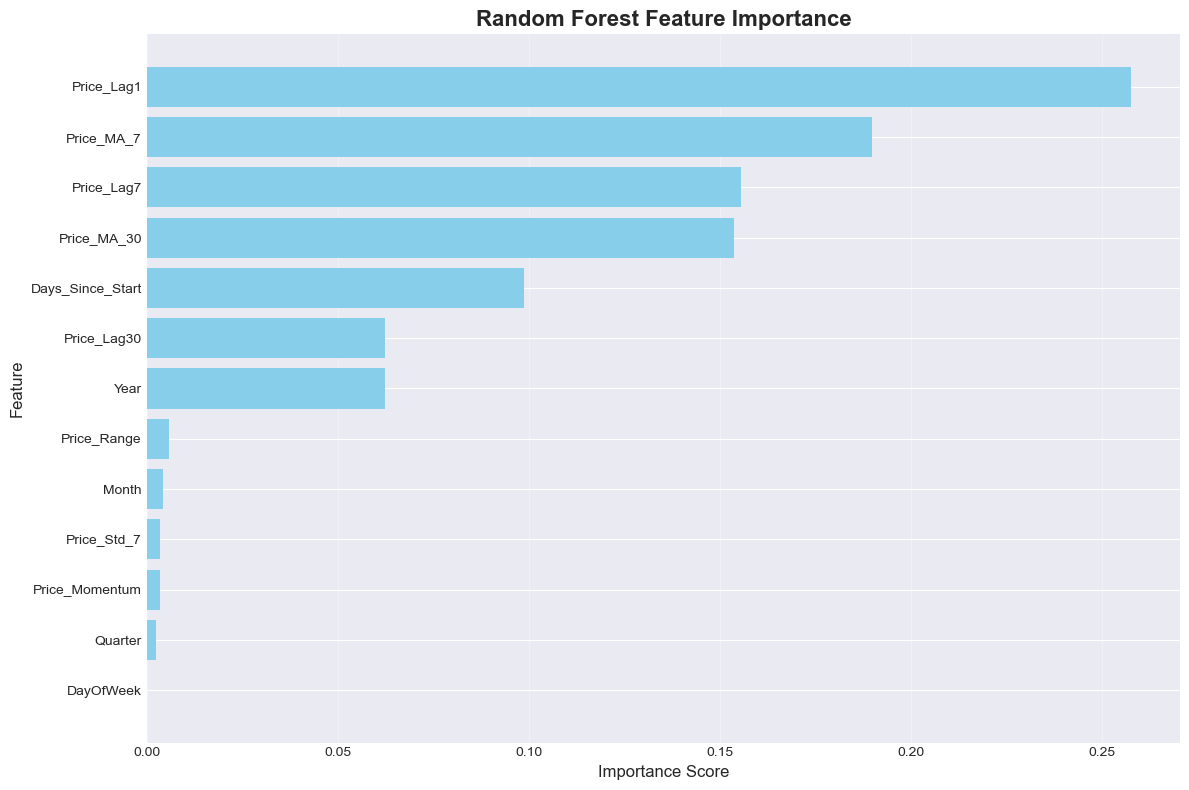

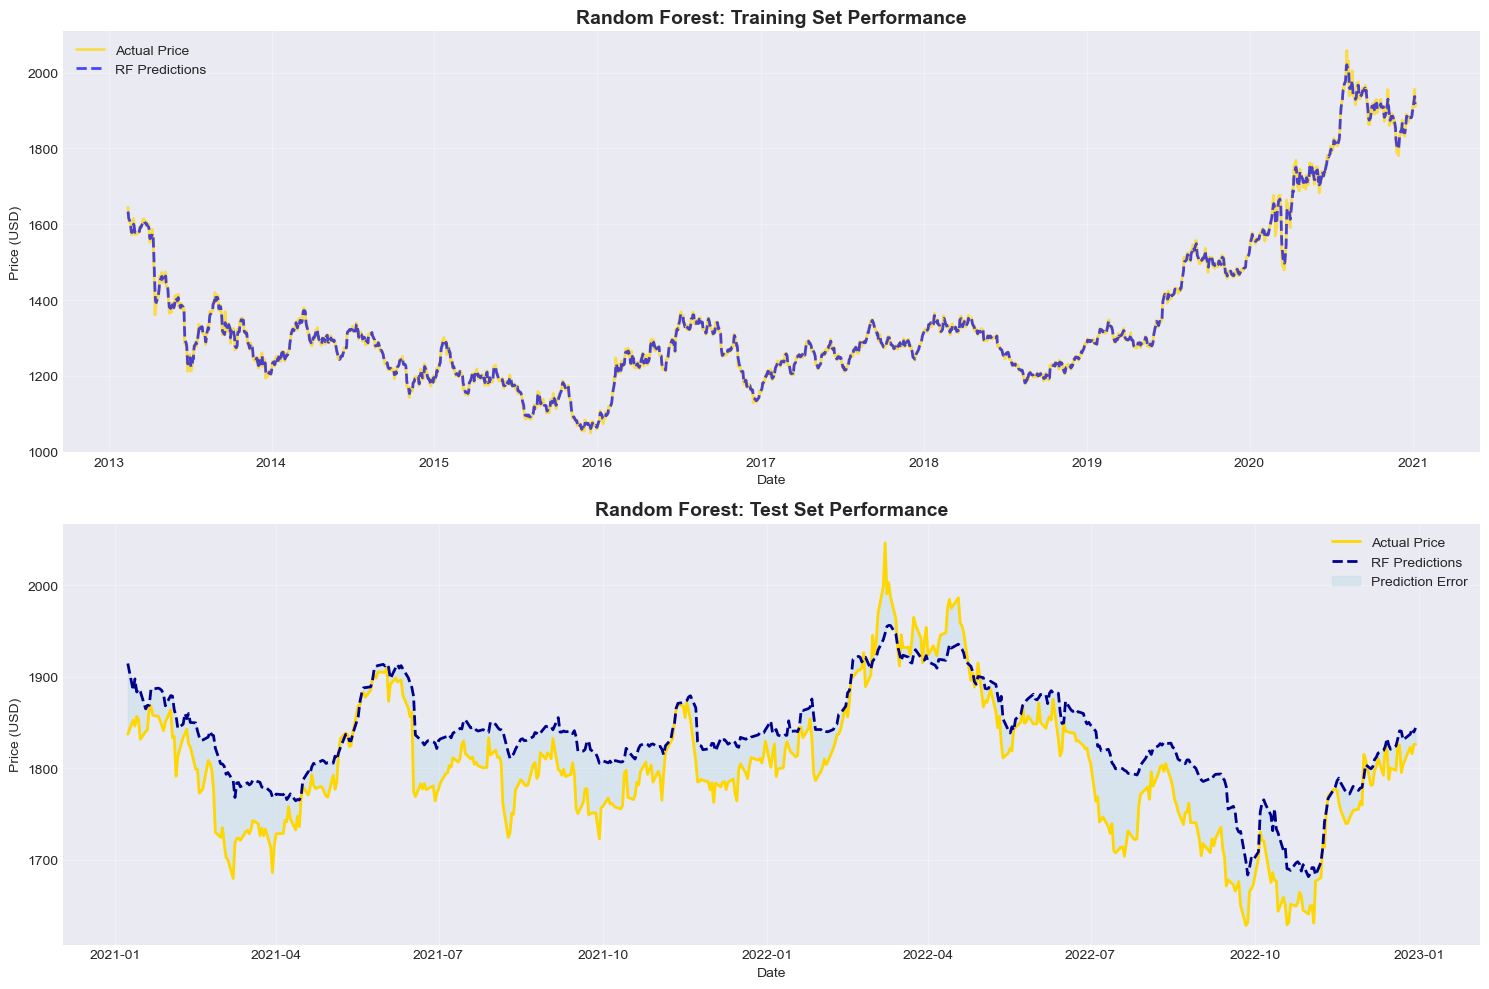

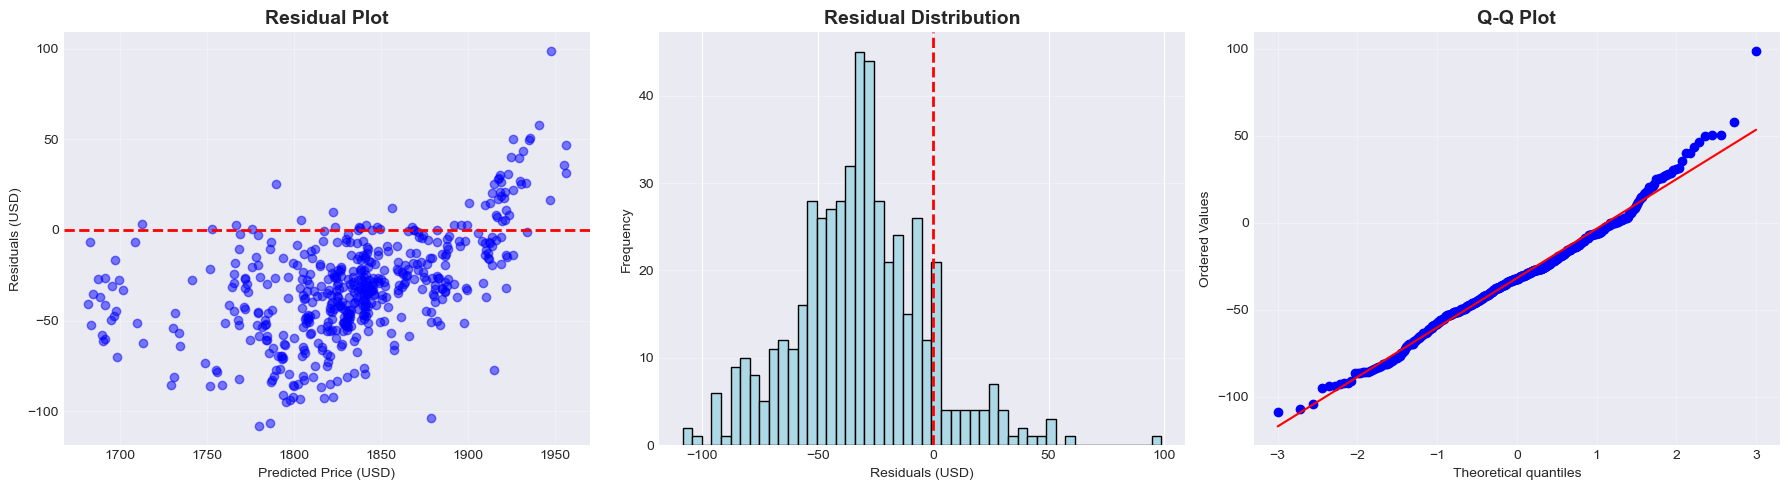


Residual Statistics:
  Mean: -31.72
  Std Dev: 28.52
  Min: -108.42
  Max: 98.71

✓ Random Forest Regressor saved as: random_forest_regressor.pkl
✓ RF Scaler saved as: rf_scaler.pkl
✓ RF Feature columns saved as: rf_feature_columns.pkl

9. Hyperparameter Tuning for Random Forest Regressor...
Note: This may take several minutes...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

✓ Best parameters found:
  n_estimators: 100
  min_samples_split: 2
  min_samples_leaf: 1
  max_features: None
  max_depth: 20

✓ Best CV R² Score: 0.8482

Tuned Model Test Performance:
  MAE: 21.94
  RMSE: 27.53
  R² Score: 0.8569

Improvement from tuning:
  MAE: 14.16 improvement
  R² Score: 0.2001 improvement

✓ Tuned Random Forest saved as: random_forest_regressor_tuned.pkl

11. TRAINING XGBOOST REGRESSOR

Training XGBoost with advanced features...
[0]	validation_0-rmse:190.16708	validation_1-rmse:477.65547
[50]	validation_0-rmse:116.72585	validation_1-rmse:289.62019
[100]	validation_0-rmse:71.

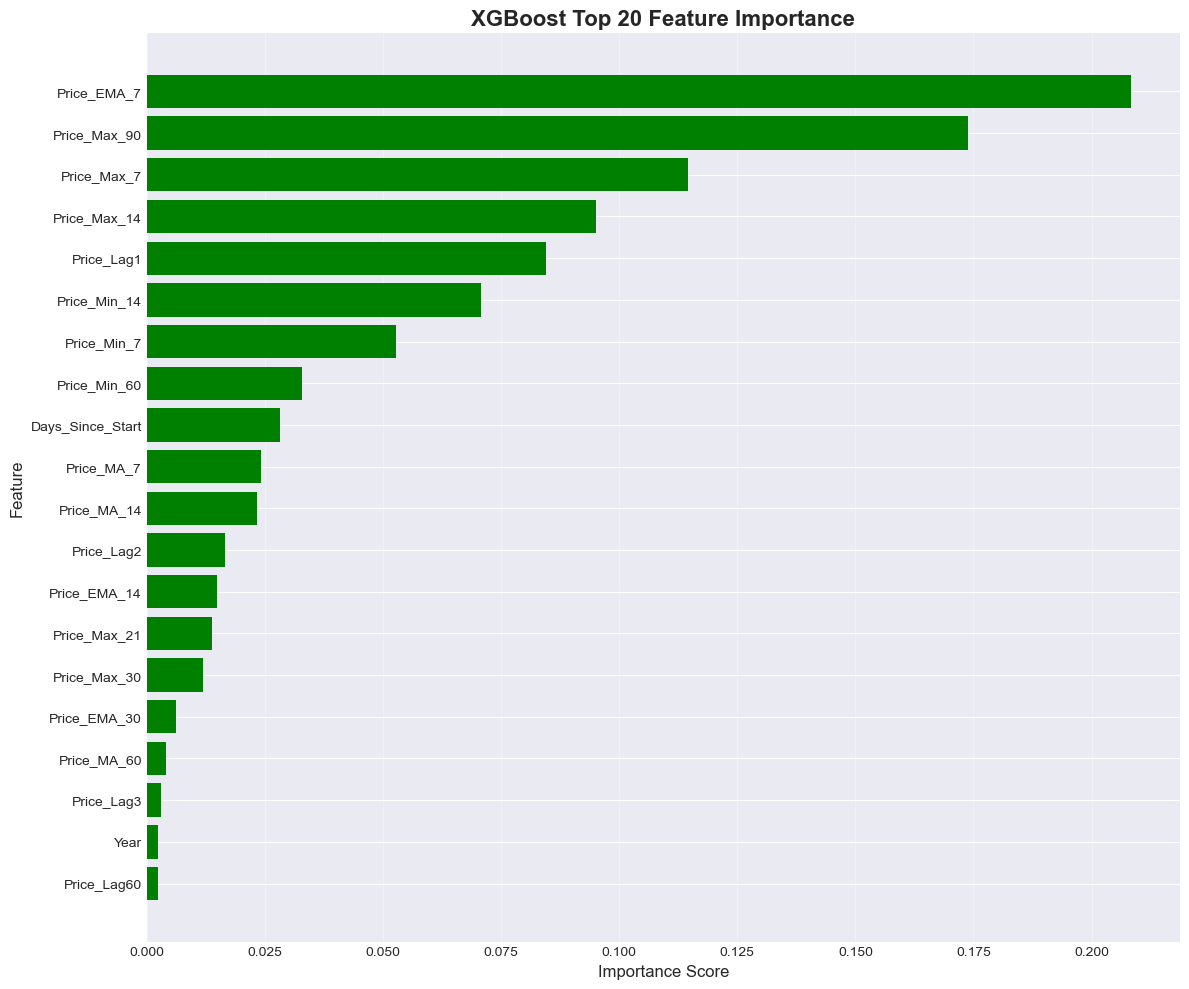

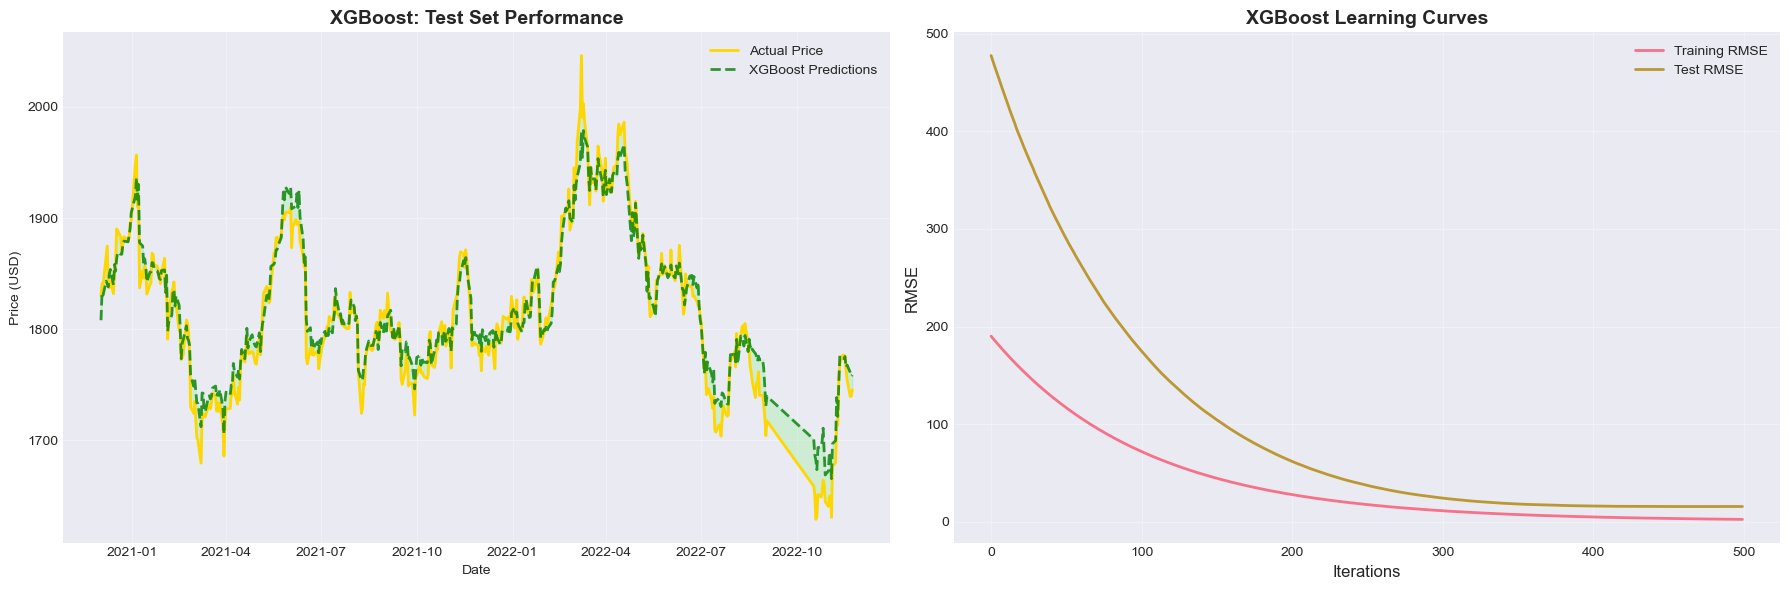


✓ XGBoost model saved as: xgboost_regressor.pkl

12. TRAINING LSTM DEEP LEARNING MODEL

Preparing sequence data for LSTM...

LSTM Training sequences shape: (1894, 30, 85)
LSTM Test sequences shape: (451, 30, 85)

Building LSTM architecture...

LSTM Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 128)        │       109,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 176,513 (689.50 KB)

 Trainable params: 176,065 (687.75 KB)

 Non-trainable params: 448 (1.75 KB)


Training LSTM model...
Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - loss: 1800272.1250 - mae: 1327.8230 - val_loss: 3212821.0000 - val_mae: 1791.0444 - learning_rate: 0.0010
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 1640559.2500 - mae: 1266.9397 - val_loss: 2656343.2500 - val_mae: 1628.3116 - learning_rate: 0.0010
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 959580.8125 - mae: 953.6401 - val_loss: 1039116.1250 - val_mae: 1017.3458 - learning_rate: 0.0010
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 221965.6406 - mae: 409.6488 - val_loss: 188956.2188 - val_mae: 430.7681 - learning_rate: 0.0010
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 83443.1328 - mae: 219.1699 - val_loss: 458558.0625 - val_mae: 657.0485 - learning_rate: 0.0010
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 88089.7266 - mae: 226.9716 - val_loss: 536179.0000 - val_mae: 727.4851 - learning_rate: 0.0010
Epoch 7/100
60/60 ━━━━━━━━━━━━━

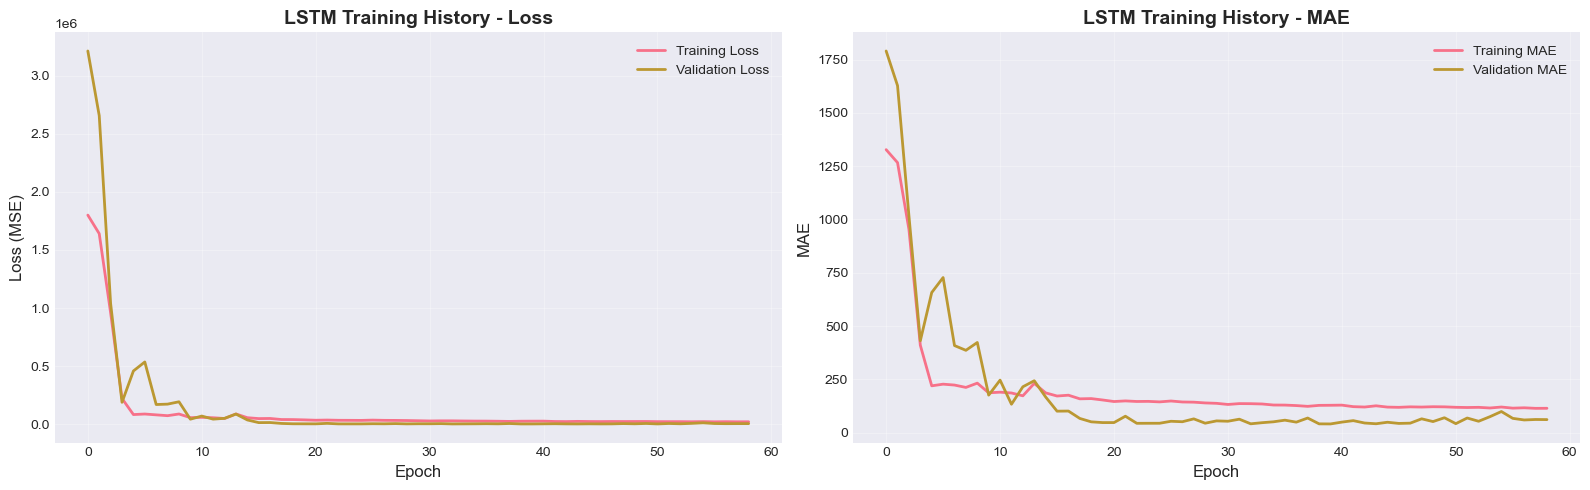

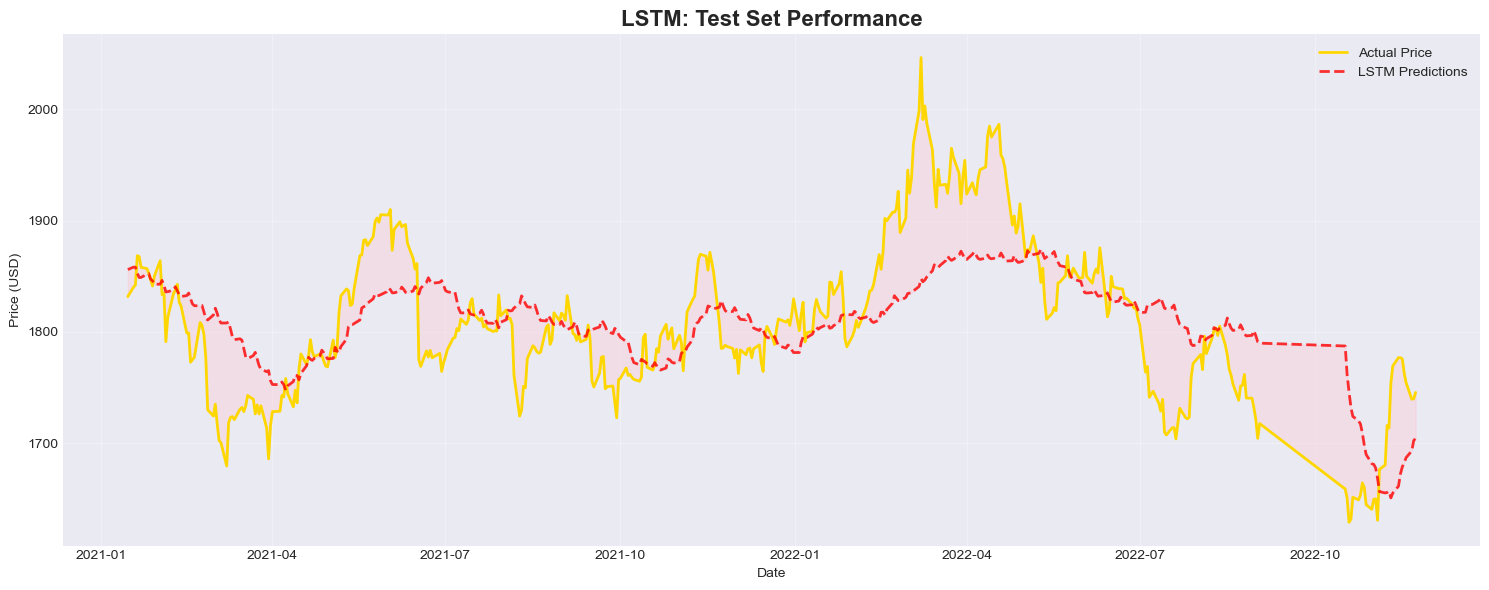


✓ LSTM model saved as: lstm_model.h5
✓ LSTM scaler saved as: scaler_lstm.pkl

13. COMPREHENSIVE MODEL COMPARISON

Data shape after cleaning: (2548, 20)

Target distribution:
Target
1    1290
0    1258
Name: count, dtype: int64

Target proportion:
Target
1    0.506279
0    0.493721
Name: proportion, dtype: float64


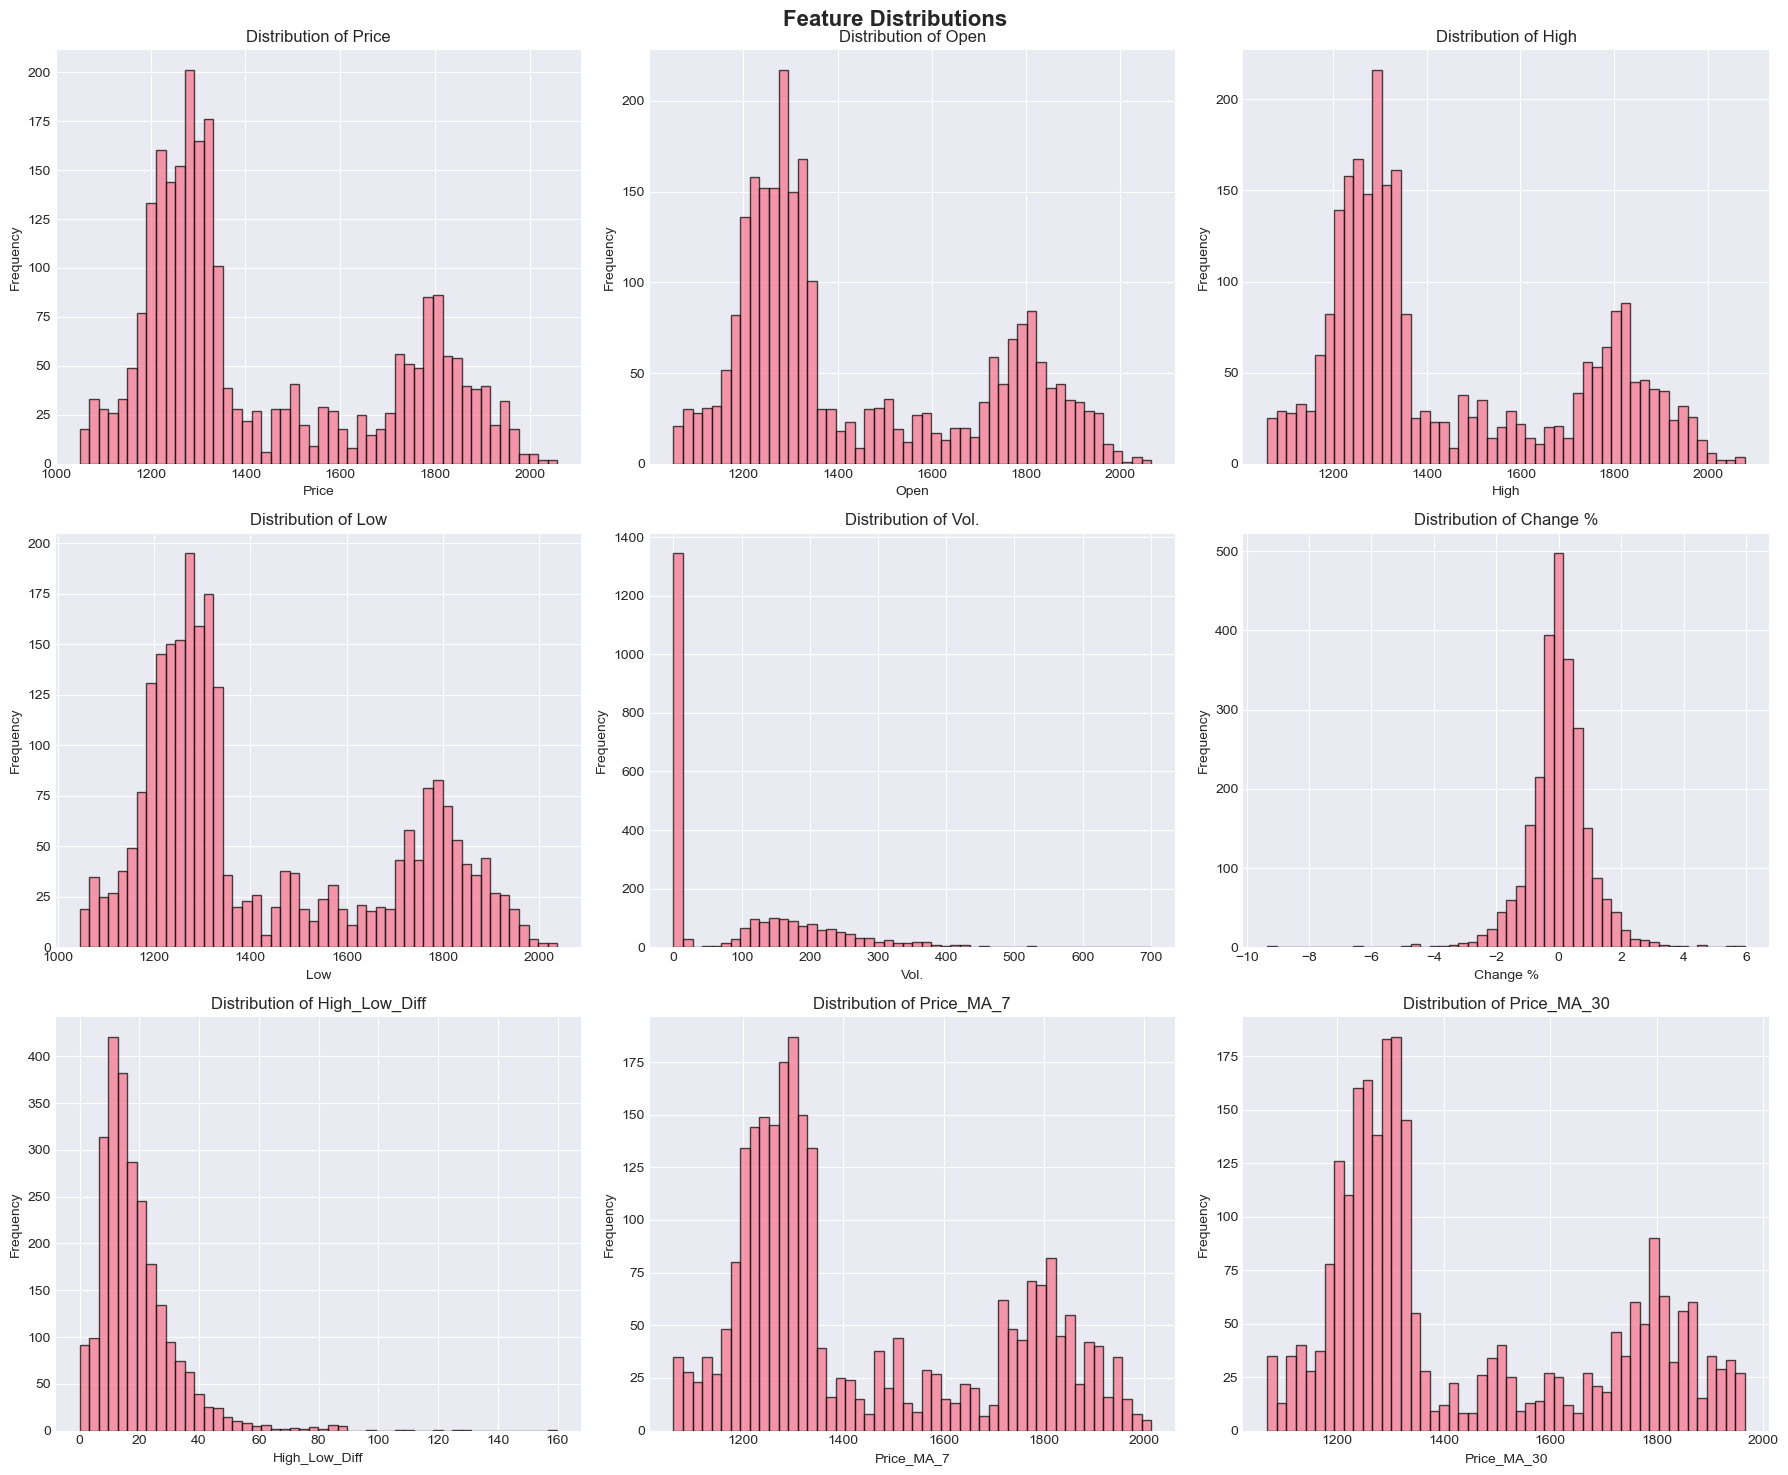

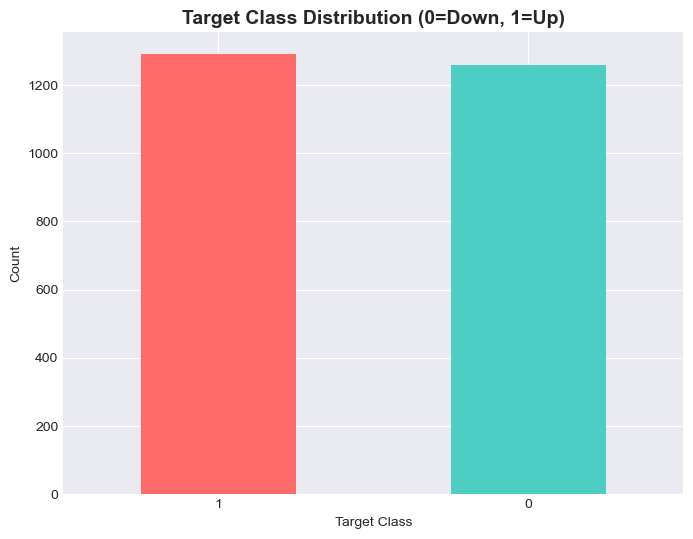

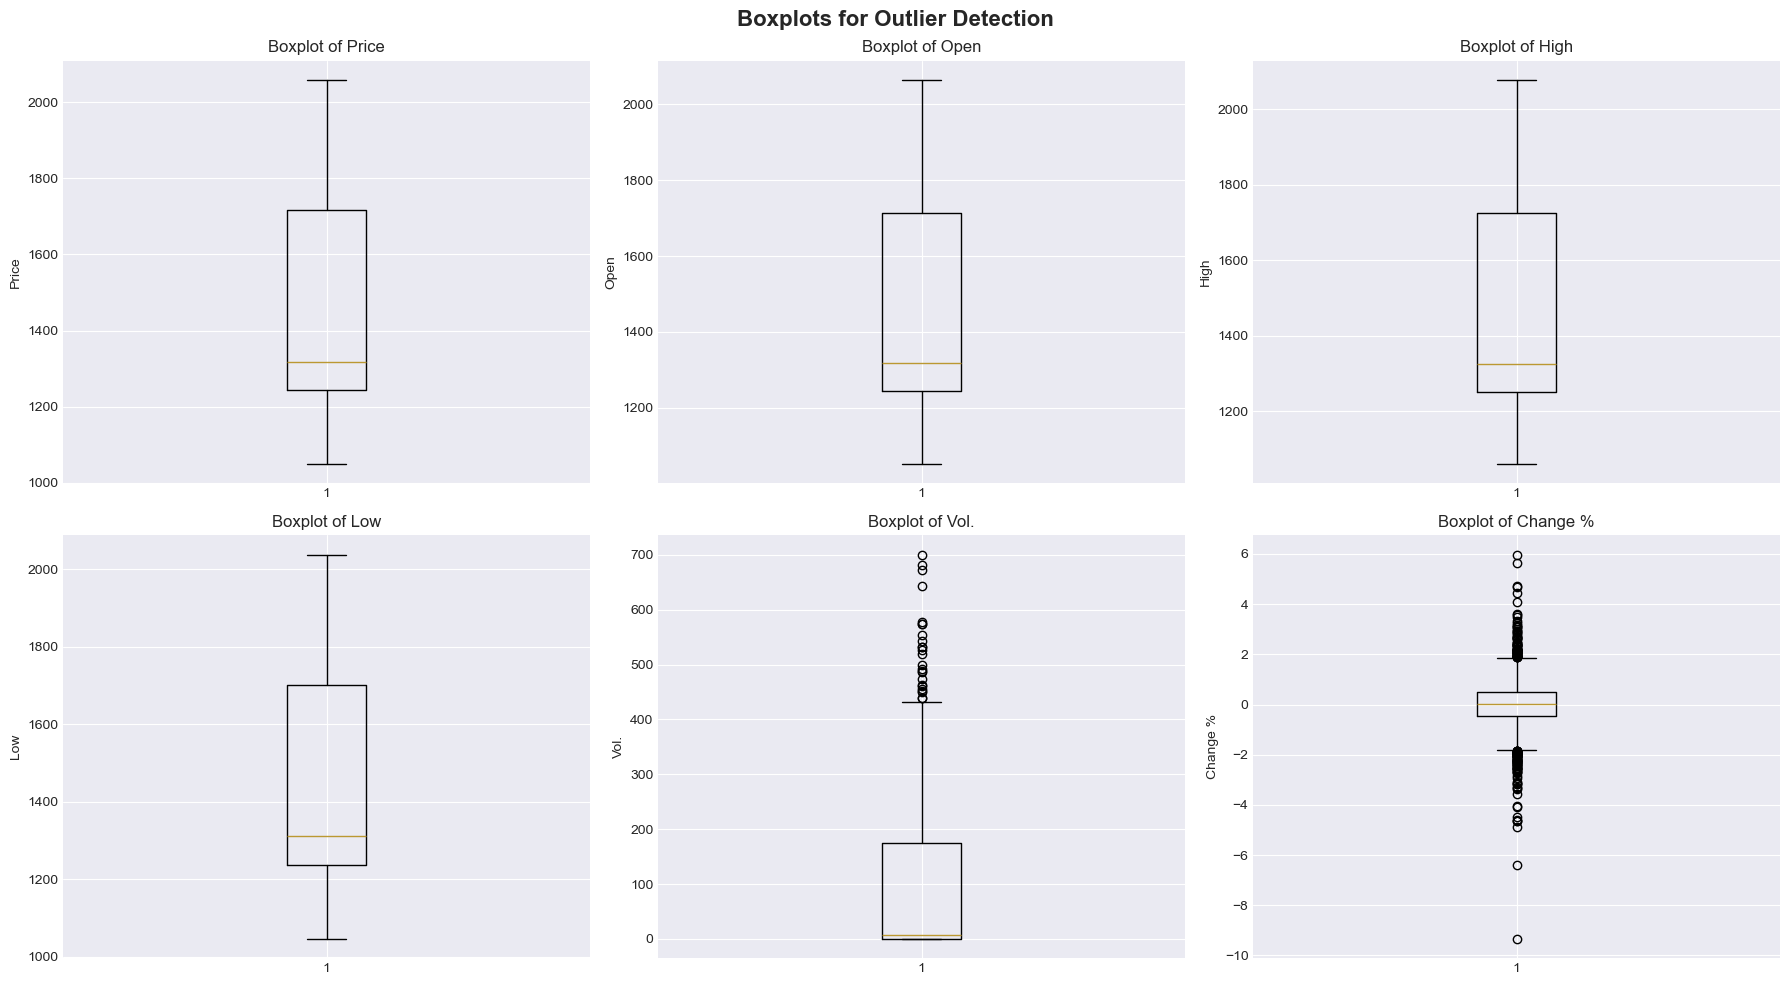

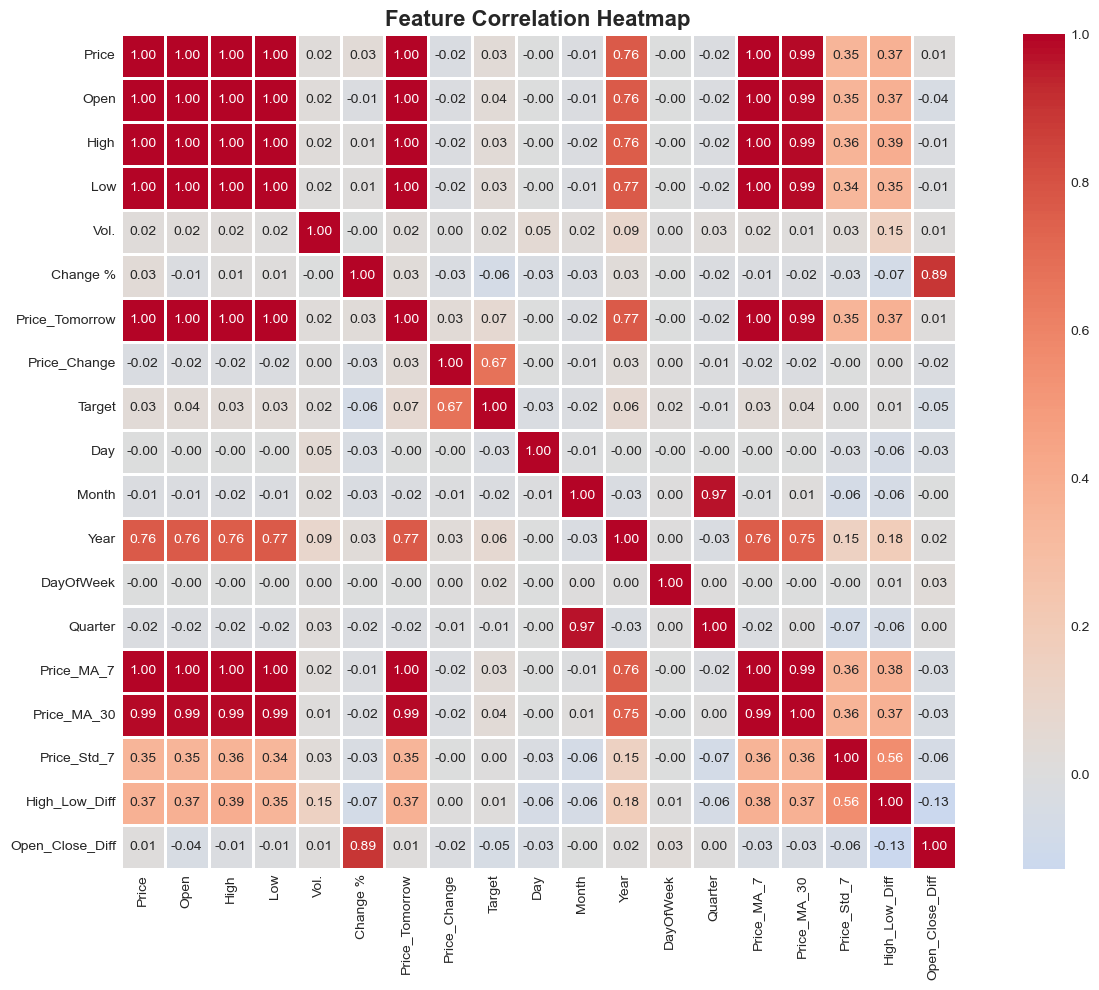

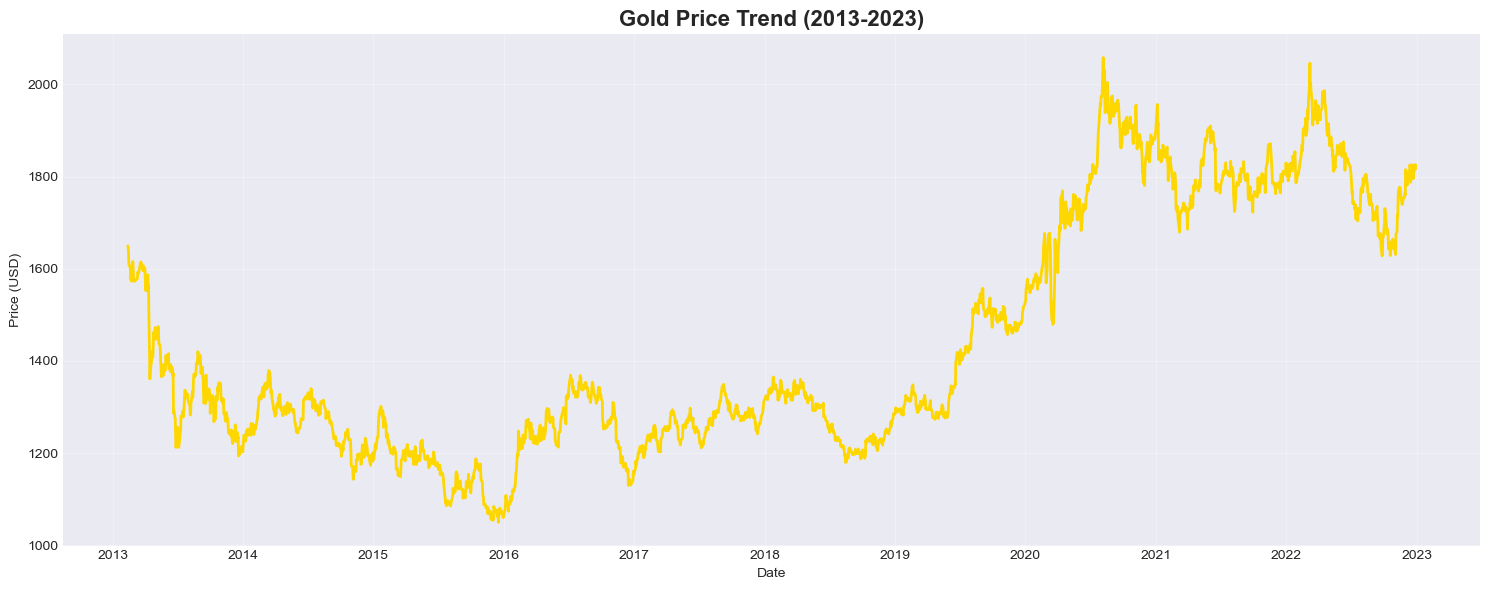

In [2]:
# ================================================
# 2. Exploratory Data Analysis (EDA)
# ================================================
print("\n" + "="*80)
print("EXPLORATORY DATA ANALYSIS")
print("="*80)

# Clean column names and data
df.columns = df.columns.str.strip()

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Clean numeric columns (remove commas and convert to float)
numeric_cols = ['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']
for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(',', '').str.replace('K', '').str.replace('%', '')
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Sort by date
df = df.sort_values('Date').reset_index(drop=True)

print("\nCleaned Data:")
print(df.head())

# ================================================
# TIME SERIES ANALYSIS
# ================================================
print("\n" + "="*80)
print("TIME SERIES ANALYSIS")
print("="*80)

# Set Date as index for time series analysis
ts_df = df.set_index('Date')
ts_df = ts_df.sort_index()

# 1. Time Series Decomposition
print("\n1. Decomposing Time Series...")
decomposition = seasonal_decompose(ts_df['Price'], model='additive', period=365)

fig, axes = plt.subplots(4, 1, figsize=(15, 12))
fig.suptitle('Gold Price Time Series Decomposition', fontsize=16, fontweight='bold')

ts_df['Price'].plot(ax=axes[0], color='gold', linewidth=2)
axes[0].set_ylabel('Original')
axes[0].set_title('Original Price')
axes[0].grid(True, alpha=0.3)

decomposition.trend.plot(ax=axes[1], color='blue', linewidth=2)
axes[1].set_ylabel('Trend')
axes[1].set_title('Trend Component')
axes[1].grid(True, alpha=0.3)

decomposition.seasonal.plot(ax=axes[2], color='green', linewidth=2)
axes[2].set_ylabel('Seasonal')
axes[2].set_title('Seasonal Component')
axes[2].grid(True, alpha=0.3)

decomposition.resid.plot(ax=axes[3], color='red', linewidth=1)
axes[3].set_ylabel('Residual')
axes[3].set_title('Residual Component')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('time_series_decomposition.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Stationarity Test (Augmented Dickey-Fuller Test)
print("\n2. Testing for Stationarity (ADF Test)...")
adf_result = adfuller(ts_df['Price'].dropna())
print(f"ADF Statistic: {adf_result[0]:.6f}")
print(f"p-value: {adf_result[1]:.6f}")
print(f"Critical Values:")
for key, value in adf_result[4].items():
    print(f"  {key}: {value:.3f}")

if adf_result[1] <= 0.05:
    print("✓ Series is stationary (reject H0)")
else:
    print("✗ Series is non-stationary (fail to reject H0)")

# 3. ACF and PACF plots
print("\n3. Plotting ACF and PACF...")
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
fig.suptitle('Autocorrelation Analysis', fontsize=16, fontweight='bold')

plot_acf(ts_df['Price'].dropna(), lags=50, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')
axes[0].grid(True, alpha=0.3)

plot_pacf(ts_df['Price'].dropna(), lags=50, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('acf_pacf_plots.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Rolling Statistics
print("\n4. Calculating Rolling Statistics...")
rolling_mean = ts_df['Price'].rolling(window=30).mean()
rolling_std = ts_df['Price'].rolling(window=30).std()

plt.figure(figsize=(15, 6))
plt.plot(ts_df.index, ts_df['Price'], color='gold', linewidth=1.5, label='Original Price', alpha=0.7)
plt.plot(ts_df.index, rolling_mean, color='blue', linewidth=2, label='30-Day Rolling Mean')
plt.plot(ts_df.index, rolling_std, color='red', linewidth=2, label='30-Day Rolling Std')
plt.title('Gold Price with Rolling Statistics', fontsize=16, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('rolling_statistics.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. ARIMA Model for Time Series Forecasting
print("\n5. Training ARIMA Model...")
# Use last 80% for training, 20% for testing
train_size = int(len(ts_df) * 0.8)
train_ts = ts_df['Price'][:train_size]
test_ts = ts_df['Price'][train_size:]

# Fit ARIMA model (using auto-selected parameters)
try:
    arima_model = ARIMA(train_ts, order=(2, 1, 2))
    arima_fitted = arima_model.fit()
    
    print("\nARIMA Model Summary:")
    print(arima_fitted.summary())
    
    # Make predictions
    arima_predictions = arima_fitted.forecast(steps=len(test_ts))
    
    # Calculate metrics
    arima_mae = mean_absolute_error(test_ts, arima_predictions)
    arima_rmse = np.sqrt(mean_squared_error(test_ts, arima_predictions))
    arima_r2 = r2_score(test_ts, arima_predictions)
    
    print(f"\nARIMA Model Performance:")
    print(f"MAE: {arima_mae:.2f}")
    print(f"RMSE: {arima_rmse:.2f}")
    print(f"R² Score: {arima_r2:.4f}")
    
    # Plot ARIMA predictions
    plt.figure(figsize=(15, 6))
    plt.plot(train_ts.index, train_ts, label='Training Data', color='blue', linewidth=1.5)
    plt.plot(test_ts.index, test_ts, label='Actual Test Data', color='gold', linewidth=2)
    plt.plot(test_ts.index, arima_predictions, label='ARIMA Predictions', 
             color='red', linewidth=2, linestyle='--')
    plt.title('ARIMA Model: Gold Price Forecast', fontsize=16, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('arima_forecast.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Save ARIMA model
    joblib.dump(arima_fitted, 'arima_model.pkl')
    
except Exception as e:
    print(f"ARIMA model fitting failed: {e}")
    arima_fitted = None

# 6. Exponential Smoothing (Holt-Winters)
print("\n6. Training Exponential Smoothing Model...")
try:
    exp_model = ExponentialSmoothing(train_ts, seasonal_periods=365, 
                                     trend='add', seasonal='add')
    exp_fitted = exp_model.fit()
    
    # Make predictions
    exp_predictions = exp_fitted.forecast(steps=len(test_ts))
    
    # Calculate metrics
    exp_mae = mean_absolute_error(test_ts, exp_predictions)
    exp_rmse = np.sqrt(mean_squared_error(test_ts, exp_predictions))
    exp_r2 = r2_score(test_ts, exp_predictions)
    
    print(f"\nExponential Smoothing Model Performance:")
    print(f"MAE: {exp_mae:.2f}")
    print(f"RMSE: {exp_rmse:.2f}")
    print(f"R² Score: {exp_r2:.4f}")
    
    # Plot predictions
    plt.figure(figsize=(15, 6))
    plt.plot(train_ts.index, train_ts, label='Training Data', color='blue', linewidth=1.5)
    plt.plot(test_ts.index, test_ts, label='Actual Test Data', color='gold', linewidth=2)
    plt.plot(test_ts.index, exp_predictions, label='Exp. Smoothing Predictions', 
             color='green', linewidth=2, linestyle='--')
    plt.title('Exponential Smoothing: Gold Price Forecast', fontsize=16, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('exp_smoothing_forecast.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Save Exponential Smoothing model
    joblib.dump(exp_fitted, 'exp_smoothing_model.pkl')
    
except Exception as e:
    print(f"Exponential Smoothing model fitting failed: {e}")
    exp_fitted = None

# 7. Time Series Regression Models
print("\n7. Training Time Series Regression Models...")

# Create time-based features for regression
ts_df_reg = ts_df.copy()
ts_df_reg['Days_Since_Start'] = (ts_df_reg.index - ts_df_reg.index[0]).days
ts_df_reg['Price_Lag1'] = ts_df_reg['Price'].shift(1)
ts_df_reg['Price_Lag7'] = ts_df_reg['Price'].shift(7)
ts_df_reg['Price_Lag30'] = ts_df_reg['Price'].shift(30)
ts_df_reg['Price_MA_7'] = ts_df_reg['Price'].rolling(window=7).mean()
ts_df_reg['Price_MA_30'] = ts_df_reg['Price'].rolling(window=30).mean()
ts_df_reg['Price_Std_7'] = ts_df_reg['Price'].rolling(window=7).std()

ts_df_reg = ts_df_reg.dropna()

# Features for regression
ts_features = ['Days_Since_Start', 'Price_Lag1', 'Price_Lag7', 'Price_Lag30', 
               'Price_MA_7', 'Price_MA_30', 'Price_Std_7']
X_ts = ts_df_reg[ts_features]
y_ts = ts_df_reg['Price']

# Time series split
tscv = TimeSeriesSplit(n_splits=5)
train_idx, test_idx = list(tscv.split(X_ts))[-1]

X_train_ts = X_ts.iloc[train_idx]
X_test_ts = X_ts.iloc[test_idx]
y_train_ts = y_ts.iloc[train_idx]
y_test_ts = y_ts.iloc[test_idx]

# Scale features
scaler_ts = StandardScaler()
X_train_ts_scaled = scaler_ts.fit_transform(X_train_ts)
X_test_ts_scaled = scaler_ts.transform(X_test_ts)

# Train regression models
ts_regression_models = {
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf')
}

ts_regression_results = {}

for name, model in ts_regression_models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_ts_scaled, y_train_ts)
    
    predictions = model.predict(X_test_ts_scaled)
    
    mae = mean_absolute_error(y_test_ts, predictions)
    rmse = np.sqrt(mean_squared_error(y_test_ts, predictions))
    r2 = r2_score(y_test_ts, predictions)
    
    ts_regression_results[name] = {
        'model': model,
        'mae': mae,
        'rmse': rmse,
        'r2': r2,
        'predictions': predictions
    }
    
    print(f"  MAE: {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R² Score: {r2:.4f}")

# Plot best regression model
best_reg_model = max(ts_regression_results, key=lambda x: ts_regression_results[x]['r2'])
best_predictions = ts_regression_results[best_reg_model]['predictions']

plt.figure(figsize=(15, 6))
plt.plot(y_test_ts.index, y_test_ts.values, label='Actual Price', color='gold', linewidth=2)
plt.plot(y_test_ts.index, best_predictions, label=f'{best_reg_model} Predictions', 
         color='purple', linewidth=2, linestyle='--')
plt.title(f'Time Series Regression: {best_reg_model}', fontsize=16, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('ts_regression_forecast.png', dpi=300, bbox_inches='tight')
plt.show()

# Save best regression model
joblib.dump(ts_regression_results[best_reg_model]['model'], 'ts_regression_model.pkl')
joblib.dump(scaler_ts, 'ts_scaler.pkl')

# 8. Advanced Random Forest Regressor with Enhanced Features
print("\n8. Creating Advanced Time Series Features...")

# Create comprehensive time series features
def create_advanced_ts_features(df_input, target_col='Price'):
    """Create advanced time series features including lags, rolling stats, trend, and seasonality"""
    df = df_input.copy()
    
    print("\nCreating advanced features...")
    
    # 1. LAG FEATURES (Multiple time horizons)
    print("  - Adding lag features...")
    for lag in [1, 2, 3, 5, 7, 14, 21, 30, 60, 90]:
        df[f'Price_Lag{lag}'] = df[target_col].shift(lag)
    
    # 2. ROLLING STATISTICS (Multiple windows)
    print("  - Adding rolling statistics...")
    windows = [7, 14, 21, 30, 60, 90]
    for window in windows:
        # Mean
        df[f'Price_MA_{window}'] = df[target_col].rolling(window=window).mean()
        # Standard deviation (volatility)
        df[f'Price_Std_{window}'] = df[target_col].rolling(window=window).std()
        # Min and Max
        df[f'Price_Min_{window}'] = df[target_col].rolling(window=window).min()
        df[f'Price_Max_{window}'] = df[target_col].rolling(window=window).max()
        # Range
        df[f'Price_Range_{window}'] = df[f'Price_Max_{window}'] - df[f'Price_Min_{window}']
    
    # 3. MOMENTUM AND RATE OF CHANGE
    print("  - Adding momentum features...")
    for period in [1, 7, 14, 30]:
        df[f'Price_Momentum_{period}'] = df[target_col].pct_change(period)
        df[f'Price_ROC_{period}'] = (df[target_col] - df[target_col].shift(period)) / df[target_col].shift(period)
    
    # 4. EXPONENTIAL MOVING AVERAGES
    print("  - Adding exponential moving averages...")
    for span in [7, 14, 30, 60]:
        df[f'Price_EMA_{span}'] = df[target_col].ewm(span=span, adjust=False).mean()
    
    # 5. TREND FEATURES
    print("  - Adding trend features...")
    # Linear trend over different windows
    for window in [30, 60, 90]:
        def calc_trend(x):
            if len(x) < 2:
                return 0
            return np.polyfit(range(len(x)), x, 1)[0]
        
        df[f'Price_Trend_{window}'] = df[target_col].rolling(window=window).apply(calc_trend, raw=True)
    
    # Detrended price
    df['Price_Detrended'] = df[target_col] - df['Price_MA_30']
    
    # 6. SEASONALITY FEATURES
    print("  - Adding seasonality features...")
    df['DayOfWeek'] = df.index.dayofweek
    df['Month'] = df.index.month
    df['Quarter'] = df.index.quarter
    df['DayOfMonth'] = df.index.day
    df['WeekOfYear'] = df.index.isocalendar().week
    df['Year'] = df.index.year
    
    # Cyclical encoding for temporal features
    df['Month_Sin'] = np.sin(2 * np.pi * df['Month'] / 12)
    df['Month_Cos'] = np.cos(2 * np.pi * df['Month'] / 12)
    df['DayOfWeek_Sin'] = np.sin(2 * np.pi * df['DayOfWeek'] / 7)
    df['DayOfWeek_Cos'] = np.cos(2 * np.pi * df['DayOfWeek'] / 7)
    
    # 7. ADDITIONAL TECHNICAL INDICATORS
    print("  - Adding technical indicators...")
    df['Days_Since_Start'] = (df.index - df.index[0]).days
    
    # High-Low spread
    if 'High' in df.columns and 'Low' in df.columns:
        df['Price_HL_Spread'] = df['High'] - df['Low']
        df['Price_HL_Ratio'] = df['High'] / df['Low']
    
    # Open-Close difference
    if 'Open' in df_input.columns:
        df['Price_OC_Diff'] = df[target_col] - df['Open']
    
    # Volume features (if available)
    if 'Vol.' in df.columns:
        df['Volume_MA_7'] = df['Vol.'].rolling(window=7).mean()
        df['Volume_MA_30'] = df['Vol.'].rolling(window=30).mean()
        df['Volume_Std_7'] = df['Vol.'].rolling(window=7).std()
    
    # 8. BOLLINGER BANDS
    print("  - Adding Bollinger Bands...")
    for window in [20, 30]:
        rolling_mean = df[target_col].rolling(window=window).mean()
        rolling_std = df[target_col].rolling(window=window).std()
        df[f'BB_Upper_{window}'] = rolling_mean + (2 * rolling_std)
        df[f'BB_Lower_{window}'] = rolling_mean - (2 * rolling_std)
        df[f'BB_Width_{window}'] = df[f'BB_Upper_{window}'] - df[f'BB_Lower_{window}']
        df[f'BB_Position_{window}'] = (df[target_col] - df[f'BB_Lower_{window}']) / df[f'BB_Width_{window}']
    
    # 9. RELATIVE STRENGTH INDEX (RSI)
    print("  - Adding RSI...")
    def calculate_rsi(data, window=14):
        delta = data.diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
        rs = gain / loss
        rsi = 100 - (100 / (1 + rs))
        return rsi
    
    df['RSI_14'] = calculate_rsi(df[target_col], 14)
    df['RSI_30'] = calculate_rsi(df[target_col], 30)
    
    # 10. AUTOCORRELATION FEATURES
    print("  - Adding autocorrelation features...")
    for lag in [7, 30]:
        df[f'AutoCorr_{lag}'] = df[target_col].rolling(window=lag*2).apply(
            lambda x: x.autocorr(lag=lag) if len(x) >= lag*2 else 0, raw=False
        )
    
    print(f"\n✓ Created {len(df.columns)} total features")
    print(f"✓ Original shape: {df_input.shape}, New shape: {df.shape}")
    
    return df

# Apply advanced feature engineering
ts_df_advanced = create_advanced_ts_features(ts_df)
ts_df_advanced = ts_df_advanced.dropna()

print(f"\nFinal feature matrix shape after removing NaN: {ts_df_advanced.shape}")

# Select all numeric features except the target
feature_columns_advanced = [col for col in ts_df_advanced.columns 
                           if col not in ['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']]

print(f"\nTotal features for modeling: {len(feature_columns_advanced)}")
print(f"\nFeature categories:")
lag_features = [f for f in feature_columns_advanced if 'Lag' in f]
rolling_features = [f for f in feature_columns_advanced if any(x in f for x in ['MA_', 'Std_', 'Min_', 'Max_', 'Range_'])]
momentum_features = [f for f in feature_columns_advanced if any(x in f for x in ['Momentum', 'ROC', 'EMA'])]
trend_features = [f for f in feature_columns_advanced if 'Trend' in f or 'Detrended' in f]
seasonality_features = [f for f in feature_columns_advanced if any(x in f for x in ['Day', 'Month', 'Quarter', 'Week', 'Year', '_Sin', '_Cos'])]
technical_features = [f for f in feature_columns_advanced if any(x in f for x in ['BB_', 'RSI', 'AutoCorr', 'HL_', 'OC_', 'Volume'])]

print(f"  Lag features: {len(lag_features)}")
print(f"  Rolling statistics: {len(rolling_features)}")
print(f"  Momentum features: {len(momentum_features)}")
print(f"  Trend features: {len(trend_features)}")
print(f"  Seasonality features: {len(seasonality_features)}")
print(f"  Technical indicators: {len(technical_features)}")

# Prepare data for advanced models
X_advanced = ts_df_advanced[feature_columns_advanced]
y_advanced = ts_df_advanced['Price']

# Time series split (80-20)
split_idx = int(len(X_advanced) * 0.8)
X_train_adv = X_advanced.iloc[:split_idx]
X_test_adv = X_advanced.iloc[split_idx:]
y_train_adv = y_advanced.iloc[:split_idx]
y_test_adv = y_advanced.iloc[split_idx:]

print(f"\nAdvanced Training set: {X_train_adv.shape}")
print(f"Advanced Test set: {X_test_adv.shape}")

# Scale features for advanced models
scaler_advanced = StandardScaler()
X_train_adv_scaled = scaler_advanced.fit_transform(X_train_adv)
X_test_adv_scaled = scaler_advanced.transform(X_test_adv)

# Save advanced scaler and features
joblib.dump(scaler_advanced, 'scaler_advanced.pkl')
joblib.dump(feature_columns_advanced, 'feature_columns_advanced.pkl')

print("\n✓ Advanced scaler saved as: scaler_advanced.pkl")
print("✓ Advanced feature columns saved as: feature_columns_advanced.pkl")

# Continue with previous RF section but now labeled as section 9
print("\n9. Training Random Forest with Basic Features...")

# Create time-based features for regression
ts_df_reg = ts_df.copy()
ts_df_reg['Days_Since_Start'] = (ts_df_reg.index - ts_df_reg.index[0]).days
ts_df_reg['Price_Lag1'] = ts_df_reg['Price'].shift(1)
ts_df_reg['Price_Lag7'] = ts_df_reg['Price'].shift(7)
ts_df_reg['Price_Lag30'] = ts_df_reg['Price'].shift(30)
ts_df_reg['Price_MA_7'] = ts_df_reg['Price'].rolling(window=7).mean()
ts_df_reg['Price_MA_30'] = ts_df_reg['Price'].rolling(window=30).mean()
ts_df_reg['Price_Std_7'] = ts_df_reg['Price'].rolling(window=7).std()

ts_df_reg = ts_df_reg.dropna()

# Features for regression
ts_features = ['Days_Since_Start', 'Price_Lag1', 'Price_Lag7', 'Price_Lag30', 
               'Price_MA_7', 'Price_MA_30', 'Price_Std_7']
X_ts = ts_df_reg[ts_features]
y_ts = ts_df_reg['Price']

# Time series split
tscv = TimeSeriesSplit(n_splits=5)
train_idx, test_idx = list(tscv.split(X_ts))[-1]

X_train_ts = X_ts.iloc[train_idx]
X_test_ts = X_ts.iloc[test_idx]
y_train_ts = y_ts.iloc[train_idx]
y_test_ts = y_ts.iloc[test_idx]

# Scale features
scaler_ts = StandardScaler()
X_train_ts_scaled = scaler_ts.fit_transform(X_train_ts)
X_test_ts_scaled = scaler_ts.transform(X_test_ts)

# Train regression models
ts_regression_models = {
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf')
}

ts_regression_results = {}

for name, model in ts_regression_models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_ts_scaled, y_train_ts)
    
    predictions = model.predict(X_test_ts_scaled)
    
    mae = mean_absolute_error(y_test_ts, predictions)
    rmse = np.sqrt(mean_squared_error(y_test_ts, predictions))
    r2 = r2_score(y_test_ts, predictions)
    
    ts_regression_results[name] = {
        'model': model,
        'mae': mae,
        'rmse': rmse,
        'r2': r2,
        'predictions': predictions
    }
    
    print(f"  MAE: {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R² Score: {r2:.4f}")

# Plot best regression model
best_reg_model = max(ts_regression_results, key=lambda x: ts_regression_results[x]['r2'])
best_predictions = ts_regression_results[best_reg_model]['predictions']

plt.figure(figsize=(15, 6))
plt.plot(y_test_ts.index, y_test_ts.values, label='Actual Price', color='gold', linewidth=2)
plt.plot(y_test_ts.index, best_predictions, label=f'{best_reg_model} Predictions', 
         color='purple', linewidth=2, linestyle='--')
plt.title(f'Time Series Regression: {best_reg_model}', fontsize=16, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('ts_regression_forecast.png', dpi=300, bbox_inches='tight')
plt.show()

# Save best regression model
joblib.dump(ts_regression_results[best_reg_model]['model'], 'ts_regression_model.pkl')
joblib.dump(scaler_ts, 'ts_scaler.pkl')

# Now section 10: Advanced Random Forest
print("\n10. Training Advanced Random Forest Regressor...")

# Create enhanced features for Random Forest
ts_df_rf = ts_df.copy()
ts_df_rf['Days_Since_Start'] = (ts_df_rf.index - ts_df_rf.index[0]).days
ts_df_rf['Price_Lag1'] = ts_df_rf['Price'].shift(1)
ts_df_rf['Price_Lag7'] = ts_df_rf['Price'].shift(7)
ts_df_rf['Price_Lag30'] = ts_df_rf['Price'].shift(30)
ts_df_rf['Price_MA_7'] = ts_df_rf['Price'].rolling(window=7).mean()
ts_df_rf['Price_MA_30'] = ts_df_rf['Price'].rolling(window=30).mean()
ts_df_rf['Price_Std_7'] = ts_df_rf['Price'].rolling(window=7).std()
ts_df_rf['Price_Momentum'] = ts_df_rf['Price'].pct_change(7)
ts_df_rf['Price_Range'] = ts_df_rf['High'] - ts_df_rf['Low']
ts_df_rf['DayOfWeek'] = ts_df_rf.index.dayofweek
ts_df_rf['Month'] = ts_df_rf.index.month
ts_df_rf['Quarter'] = ts_df_rf.index.quarter
ts_df_rf['Year'] = ts_df_rf.index.year

# Remove trend
ts_df_rf['Price_Detrended'] = ts_df_rf['Price'] - ts_df_rf['Price_MA_30']

ts_df_rf = ts_df_rf.dropna()

# Enhanced features for Random Forest
rf_features = ['Days_Since_Start', 'Price_Lag1', 'Price_Lag7', 'Price_Lag30', 
               'Price_MA_7', 'Price_MA_30', 'Price_Std_7', 'Price_Momentum',
               'Price_Range', 'DayOfWeek', 'Month', 'Quarter', 'Year']

X_rf = ts_df_rf[rf_features]
y_rf = ts_df_rf['Price']

print(f"\nRandom Forest feature matrix shape: {X_rf.shape}")
print(f"Features used: {rf_features}")

# Time series split for Random Forest
split_idx = int(len(X_rf) * 0.8)
X_train_rf = X_rf.iloc[:split_idx]
X_test_rf = X_rf.iloc[split_idx:]
y_train_rf = y_rf.iloc[:split_idx]
y_test_rf = y_rf.iloc[split_idx:]

print(f"\nRF Training set: {X_train_rf.shape}")
print(f"RF Test set: {X_test_rf.shape}")

# Scale features
scaler_rf = StandardScaler()
X_train_rf_scaled = scaler_rf.fit_transform(X_train_rf)
X_test_rf_scaled = scaler_rf.transform(X_test_rf)

# Train Random Forest with optimized parameters
print("\nTraining optimized Random Forest Regressor...")
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rf_model.fit(X_train_rf_scaled, y_train_rf)

# Predictions
y_train_pred_rf = rf_model.predict(X_train_rf_scaled)
y_test_pred_rf = rf_model.predict(X_test_rf_scaled)

# Calculate metrics
train_mae_rf = mean_absolute_error(y_train_rf, y_train_pred_rf)
test_mae_rf = mean_absolute_error(y_test_rf, y_test_pred_rf)
train_rmse_rf = np.sqrt(mean_squared_error(y_train_rf, y_train_pred_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test_rf, y_test_pred_rf))
train_r2_rf = r2_score(y_train_rf, y_train_pred_rf)
test_r2_rf = r2_score(y_test_rf, y_test_pred_rf)

print(f"\n{'='*80}")
print("RANDOM FOREST REGRESSOR PERFORMANCE")
print(f"{'='*80}")
print(f"\nTraining Metrics:")
print(f"  MAE: {train_mae_rf:.2f}")
print(f"  RMSE: {train_rmse_rf:.2f}")
print(f"  R² Score: {train_r2_rf:.4f}")

print(f"\nTest Metrics:")
print(f"  MAE: {test_mae_rf:.2f}")
print(f"  RMSE: {test_rmse_rf:.2f}")
print(f"  R² Score: {test_r2_rf:.4f}")

# Check for overfitting
overfitting_diff = train_r2_rf - test_r2_rf
if overfitting_diff > 0.1:
    print(f"\n⚠️  Warning: Possible overfitting detected (R² diff: {overfitting_diff:.4f})")
else:
    print(f"\n✓ Model appears well-generalized (R² diff: {overfitting_diff:.4f})")

# Feature importance analysis
print("\nFeature Importance Analysis:")
feature_importance = pd.DataFrame({
    'Feature': rf_features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10).to_string(index=False))

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Random Forest Feature Importance', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('rf_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot predictions vs actual
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Training predictions
axes[0].plot(y_train_rf.index, y_train_rf.values, label='Actual Price', 
            color='gold', linewidth=2, alpha=0.7)
axes[0].plot(y_train_rf.index, y_train_pred_rf, label='RF Predictions', 
            color='blue', linewidth=2, linestyle='--', alpha=0.7)
axes[0].set_title('Random Forest: Training Set Performance', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price (USD)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Test predictions
axes[1].plot(y_test_rf.index, y_test_rf.values, label='Actual Price', 
            color='gold', linewidth=2)
axes[1].plot(y_test_rf.index, y_test_pred_rf, label='RF Predictions', 
            color='darkblue', linewidth=2, linestyle='--')
axes[1].fill_between(y_test_rf.index, y_test_rf.values, y_test_pred_rf, 
                     alpha=0.3, color='lightblue', label='Prediction Error')
axes[1].set_title('Random Forest: Test Set Performance', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Price (USD)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('rf_predictions.png', dpi=300, bbox_inches='tight')
plt.show()

# Residual analysis
residuals_rf = y_test_rf - y_test_pred_rf

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Residual plot
axes[0].scatter(y_test_pred_rf, residuals_rf, alpha=0.5, color='blue')
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel('Predicted Price (USD)')
axes[0].set_ylabel('Residuals (USD)')
axes[0].set_title('Residual Plot', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Residual distribution
axes[1].hist(residuals_rf, bins=50, color='lightblue', edgecolor='black')
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Residuals (USD)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Residual Distribution', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

# Q-Q plot
from scipy import stats
stats.probplot(residuals_rf, dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot', fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('rf_residual_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nResidual Statistics:")
print(f"  Mean: {residuals_rf.mean():.2f}")
print(f"  Std Dev: {residuals_rf.std():.2f}")
print(f"  Min: {residuals_rf.min():.2f}")
print(f"  Max: {residuals_rf.max():.2f}")

# Save Random Forest model and scaler
joblib.dump(rf_model, 'random_forest_regressor.pkl')
joblib.dump(scaler_rf, 'rf_scaler.pkl')
joblib.dump(rf_features, 'rf_feature_columns.pkl')

print("\n✓ Random Forest Regressor saved as: random_forest_regressor.pkl")
print("✓ RF Scaler saved as: rf_scaler.pkl")
print("✓ RF Feature columns saved as: rf_feature_columns.pkl")

# Hyperparameter Tuning for Random Forest
print("\n9. Hyperparameter Tuning for Random Forest Regressor...")
print("Note: This may take several minutes...")

from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_distributions=param_distributions,
    n_iter=20,
    cv=3,
    scoring='r2',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train_rf_scaled, y_train_rf)

print(f"\n✓ Best parameters found:")
for param, value in random_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\n✓ Best CV R² Score: {random_search.best_score_:.4f}")

# Evaluate tuned model
tuned_rf_model = random_search.best_estimator_
y_test_pred_tuned = tuned_rf_model.predict(X_test_rf_scaled)

tuned_mae = mean_absolute_error(y_test_rf, y_test_pred_tuned)
tuned_rmse = np.sqrt(mean_squared_error(y_test_rf, y_test_pred_tuned))
tuned_r2 = r2_score(y_test_rf, y_test_pred_tuned)

print(f"\nTuned Model Test Performance:")
print(f"  MAE: {tuned_mae:.2f}")
print(f"  RMSE: {tuned_rmse:.2f}")
print(f"  R² Score: {tuned_r2:.4f}")

# Compare original vs tuned
print(f"\nImprovement from tuning:")
print(f"  MAE: {test_mae_rf - tuned_mae:.2f} {'improvement' if tuned_mae < test_mae_rf else 'decline'}")
print(f"  R² Score: {tuned_r2 - test_r2_rf:.4f} {'improvement' if tuned_r2 > test_r2_rf else 'decline'}")

# Save tuned model
joblib.dump(tuned_rf_model, 'random_forest_regressor_tuned.pkl')
print("\n✓ Tuned Random Forest saved as: random_forest_regressor_tuned.pkl")

# ================================================
# 11. XGBoost Regressor with Advanced Features
# ================================================
print("\n" + "="*80)
print("11. TRAINING XGBOOST REGRESSOR")
print("="*80)

print("\nTraining XGBoost with advanced features...")

# Train XGBoost model
xgb_model = xgb.XGBRegressor(
    n_estimators=500,
    max_depth=8,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=3,
    gamma=0.1,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1,
    verbosity=1,
    objective='reg:squarederror',
    eval_metric='rmse'   # <-- moved here
)

xgb_model.fit(
    X_train_adv_scaled, y_train_adv,
    eval_set=[(X_train_adv_scaled, y_train_adv), (X_test_adv_scaled, y_test_adv)],
    verbose=50
)

# Predictions
y_train_pred_xgb = xgb_model.predict(X_train_adv_scaled)
y_test_pred_xgb = xgb_model.predict(X_test_adv_scaled)

# Calculate metrics
train_mae_xgb = mean_absolute_error(y_train_adv, y_train_pred_xgb)
test_mae_xgb = mean_absolute_error(y_test_adv, y_test_pred_xgb)
train_rmse_xgb = np.sqrt(mean_squared_error(y_train_adv, y_train_pred_xgb))
test_rmse_xgb = np.sqrt(mean_squared_error(y_test_adv, y_test_pred_xgb))
train_r2_xgb = r2_score(y_train_adv, y_train_pred_xgb)
test_r2_xgb = r2_score(y_test_adv, y_test_pred_xgb)

print(f"\n{'='*80}")
print("XGBOOST REGRESSOR PERFORMANCE")
print(f"{'='*80}")
print(f"\nTraining Metrics:")
print(f"  MAE: {train_mae_xgb:.2f}")
print(f"  RMSE: {train_rmse_xgb:.2f}")
print(f"  R² Score: {train_r2_xgb:.4f}")

print(f"\nTest Metrics:")
print(f"  MAE: {test_mae_xgb:.2f}")
print(f"  RMSE: {test_rmse_xgb:.2f}")
print(f"  R² Score: {test_r2_xgb:.4f}")

# Feature importance
xgb_importance = pd.DataFrame({
    'Feature': feature_columns_advanced,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 15 Most Important Features (XGBoost):")
print(xgb_importance.head(15).to_string(index=False))

# Plot XGBoost feature importance
plt.figure(figsize=(12, 10))
top_features = xgb_importance.head(20)
plt.barh(top_features['Feature'], top_features['Importance'], color='green')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('XGBoost Top 20 Feature Importance', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('xgb_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot XGBoost predictions
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Test predictions
axes[0].plot(y_test_adv.index, y_test_adv.values, label='Actual Price', 
            color='gold', linewidth=2)
axes[0].plot(y_test_adv.index, y_test_pred_xgb, label='XGBoost Predictions', 
            color='green', linewidth=2, linestyle='--', alpha=0.8)
axes[0].fill_between(y_test_adv.index, y_test_adv.values, y_test_pred_xgb, 
                     alpha=0.3, color='lightgreen')
axes[0].set_title('XGBoost: Test Set Performance', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price (USD)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Learning curves
results = xgb_model.evals_result()
axes[1].plot(results['validation_0']['rmse'], label='Training RMSE', linewidth=2)
axes[1].plot(results['validation_1']['rmse'], label='Test RMSE', linewidth=2)
axes[1].set_xlabel('Iterations', fontsize=12)
axes[1].set_ylabel('RMSE', fontsize=12)
axes[1].set_title('XGBoost Learning Curves', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('xgb_performance.png', dpi=300, bbox_inches='tight')
plt.show()

# Save XGBoost model
joblib.dump(xgb_model, 'xgboost_regressor.pkl')
print("\n✓ XGBoost model saved as: xgboost_regressor.pkl")

# ================================================
# 12. Deep Learning (LSTM) Model
# ================================================
print("\n" + "="*80)
print("12. TRAINING LSTM DEEP LEARNING MODEL")
print("="*80)

# Prepare data for LSTM (needs 3D shape: samples, timesteps, features)
print("\nPreparing sequence data for LSTM...")

def create_sequences(X, y, time_steps=30):
    """Create sequences for LSTM"""
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

# Use MinMaxScaler for LSTM (better for neural networks)
scaler_lstm = MinMaxScaler()
X_train_lstm_scaled = scaler_lstm.fit_transform(X_train_adv)
X_test_lstm_scaled = scaler_lstm.transform(X_test_adv)

# Create sequences
time_steps = 30
X_train_seq, y_train_seq = create_sequences(X_train_lstm_scaled, y_train_adv, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test_lstm_scaled, y_test_adv, time_steps)

print(f"\nLSTM Training sequences shape: {X_train_seq.shape}")
print(f"LSTM Test sequences shape: {X_test_seq.shape}")

# Build LSTM model
print("\nBuilding LSTM architecture...")
lstm_model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(time_steps, X_train_seq.shape[2])),
    Dropout(0.2),
    BatchNormalization(),
    
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    BatchNormalization(),
    
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    BatchNormalization(),
    
    Dense(64, activation='relu'),
    Dropout(0.2),
    
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile model
lstm_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

print("\nLSTM Model Architecture:")
lstm_model.summary()

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7, verbose=1)

# Train LSTM
print("\nTraining LSTM model...")
history = lstm_model.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_test_seq, y_test_seq),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# Predictions
y_train_pred_lstm = lstm_model.predict(X_train_seq, verbose=0).flatten()
y_test_pred_lstm = lstm_model.predict(X_test_seq, verbose=0).flatten()

# Adjust y values to match sequence length
y_train_lstm_adj = y_train_adv.iloc[time_steps:time_steps+len(y_train_seq)]
y_test_lstm_adj = y_test_adv.iloc[time_steps:time_steps+len(y_test_seq)]

# Calculate metrics
train_mae_lstm = mean_absolute_error(y_train_seq, y_train_pred_lstm)
test_mae_lstm = mean_absolute_error(y_test_seq, y_test_pred_lstm)
train_rmse_lstm = np.sqrt(mean_squared_error(y_train_seq, y_train_pred_lstm))
test_rmse_lstm = np.sqrt(mean_squared_error(y_test_seq, y_test_pred_lstm))
train_r2_lstm = r2_score(y_train_seq, y_train_pred_lstm)
test_r2_lstm = r2_score(y_test_seq, y_test_pred_lstm)

print(f"\n{'='*80}")
print("LSTM DEEP LEARNING MODEL PERFORMANCE")
print(f"{'='*80}")
print(f"\nTraining Metrics:")
print(f"  MAE: {train_mae_lstm:.2f}")
print(f"  RMSE: {train_rmse_lstm:.2f}")
print(f"  R² Score: {train_r2_lstm:.4f}")

print(f"\nTest Metrics:")
print(f"  MAE: {test_mae_lstm:.2f}")
print(f"  RMSE: {test_rmse_lstm:.2f}")
print(f"  R² Score: {test_r2_lstm:.4f}")

# Plot LSTM training history
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss (MSE)', fontsize=12)
axes[0].set_title('LSTM Training History - Loss', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(history.history['mae'], label='Training MAE', linewidth=2)
axes[1].plot(history.history['val_mae'], label='Validation MAE', linewidth=2)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('MAE', fontsize=12)
axes[1].set_title('LSTM Training History - MAE', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('lstm_training_history.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot LSTM predictions
plt.figure(figsize=(15, 6))
test_dates = y_test_adv.index[time_steps:time_steps+len(y_test_seq)]
plt.plot(test_dates, y_test_seq, label='Actual Price', color='gold', linewidth=2)
plt.plot(test_dates, y_test_pred_lstm, label='LSTM Predictions', 
        color='red', linewidth=2, linestyle='--', alpha=0.8)
plt.fill_between(test_dates, y_test_seq, y_test_pred_lstm, 
                 alpha=0.3, color='pink')
plt.title('LSTM: Test Set Performance', fontsize=16, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('lstm_predictions.png', dpi=300, bbox_inches='tight')
plt.show()

# Save LSTM model
lstm_model.save('lstm_model.h5')
joblib.dump(scaler_lstm, 'scaler_lstm.pkl')
print("\n✓ LSTM model saved as: lstm_model.h5")
print("✓ LSTM scaler saved as: scaler_lstm.pkl")

# ================================================
# 13. Comprehensive Model Comparison
# ================================================
print("\n" + "="*80)
print("13. COMPREHENSIVE MODEL COMPARISON")
print("="*80)

# Feature Engineering - Create target variable for classification
df['Price_Tomorrow'] = df['Price'].shift(-1)
df['Price_Change'] = df['Price_Tomorrow'] - df['Price']
df['Target'] = (df['Price_Change'] > 0).astype(int)  # 1 if price goes up, 0 if down

# Create additional features
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Quarter'] = df['Date'].dt.quarter

# Technical indicators
df['Price_MA_7'] = df['Price'].rolling(window=7).mean()
df['Price_MA_30'] = df['Price'].rolling(window=30).mean()
df['Price_Std_7'] = df['Price'].rolling(window=7).std()
df['High_Low_Diff'] = df['High'] - df['Low']
df['Open_Close_Diff'] = df['Price'] - df['Open']

# Drop rows with NaN values
df_clean = df.dropna().reset_index(drop=True)

print(f"\nData shape after cleaning: {df_clean.shape}")
print(f"\nTarget distribution:\n{df_clean['Target'].value_counts()}")
print(f"\nTarget proportion:\n{df_clean['Target'].value_counts(normalize=True)}")

# Visualizations
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Feature Distributions', fontsize=16, fontweight='bold')

features_to_plot = ['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 
                    'High_Low_Diff', 'Price_MA_7', 'Price_MA_30']

for idx, col in enumerate(features_to_plot):
    row = idx // 3
    col_idx = idx % 3
    axes[row, col_idx].hist(df_clean[col], bins=50, edgecolor='black', alpha=0.7)
    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# Class distribution
plt.figure(figsize=(8, 6))
df_clean['Target'].value_counts().plot(kind='bar', color=['#ff6b6b', '#4ecdc4'])
plt.title('Target Class Distribution (0=Down, 1=Up)', fontsize=14, fontweight='bold')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Boxplots for outlier detection
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Boxplots for Outlier Detection', fontsize=16, fontweight='bold')

box_features = ['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']
for idx, col in enumerate(box_features):
    row = idx // 3
    col_idx = idx % 3
    axes[row, col_idx].boxplot(df_clean[col])
    axes[row, col_idx].set_title(f'Boxplot of {col}')
    axes[row, col_idx].set_ylabel(col)

plt.tight_layout()
plt.savefig('boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

# Correlation heatmap
plt.figure(figsize=(14, 10))
numeric_features = df_clean.select_dtypes(include=[np.number]).columns
correlation_matrix = df_clean[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Price trend over time
plt.figure(figsize=(15, 6))
plt.plot(df_clean['Date'], df_clean['Price'], linewidth=2, color='gold')
plt.title('Gold Price Trend (2013-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('price_trend.png', dpi=300, bbox_inches='tight')
plt.show()

In [3]:
# ================================================
# 3. Missing Values & Outlier Treatment
# ================================================
print("\n" + "="*80)
print("MISSING VALUES & OUTLIER TREATMENT")
print("="*80)

print("\nMissing values per column:")
print(df_clean.isnull().sum())

# Detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("\nOutlier Detection (IQR Method):")
for col in ['Price', 'Vol.', 'Change %']:
    outliers, lb, ub = detect_outliers_iqr(df_clean, col)
    print(f"\n{col}:")
    print(f"  Outliers found: {len(outliers)}")
    print(f"  Lower bound: {lb:.2f}, Upper bound: {ub:.2f}")


MISSING VALUES & OUTLIER TREATMENT

Missing values per column:
Date               0
Price              0
Open               0
High               0
Low                0
Vol.               0
Change %           0
Price_Tomorrow     0
Price_Change       0
Target             0
Day                0
Month              0
Year               0
DayOfWeek          0
Quarter            0
Price_MA_7         0
Price_MA_30        0
Price_Std_7        0
High_Low_Diff      0
Open_Close_Diff    0
dtype: int64

Outlier Detection (IQR Method):

Price:
  Outliers found: 0
  Lower bound: 535.14, Upper bound: 2424.04

Vol.:
  Outliers found: 25
  Lower bound: -262.36, Upper bound: 438.07

Change %:
  Outliers found: 155
  Lower bound: -1.83, Upper bound: 1.89


In [4]:
# ================================================
# 4. Feature Engineering & Preprocessing
# ================================================
print("\n" + "="*80)
print("FEATURE ENGINEERING & PREPROCESSING")
print("="*80)

# Select features for modeling
feature_cols = ['Open', 'High', 'Low', 'Vol.', 'Change %', 
                'Day', 'Month', 'DayOfWeek', 'Quarter',
                'Price_MA_7', 'Price_MA_30', 'Price_Std_7',
                'High_Low_Diff', 'Open_Close_Diff']

X = df_clean[feature_cols]
y = df_clean['Target']

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Check for skewness
print("\nSkewness of features:")
skewness = X.skew()
print(skewness[abs(skewness) > 1])

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"\nTraining set target distribution:\n{y_train.value_counts()}")
print(f"\nTest set target distribution:\n{y_test.value_counts()}")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save scaler
joblib.dump(scaler, 'scaler.pkl')

print("\nFeatures scaled using StandardScaler")



FEATURE ENGINEERING & PREPROCESSING

Feature matrix shape: (2548, 14)
Target vector shape: (2548,)

Skewness of features:
Vol.             1.162796
Price_Std_7      2.809371
High_Low_Diff    2.744446
dtype: float64

Training set size: (2038, 14)
Test set size: (510, 14)

Training set target distribution:
Target
1    1032
0    1006
Name: count, dtype: int64

Test set target distribution:
Target
1    258
0    252
Name: count, dtype: int64

Features scaled using StandardScaler


In [5]:
# ================================================
# 5. Model Building: Multiple Classifiers
# ================================================
print("\n" + "="*80)
print("MODEL BUILDING - MULTIPLE CLASSIFIERS")
print("="*80)

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(random_state=42),
    'Naive Bayes': GaussianNB()
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    model.fit(X_train_scaled, y_train)
    
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    
    results[name] = {
        'model': model,
        'train_accuracy': train_acc,
        'test_accuracy': test_acc,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'overfitting': 'Yes' if (train_acc - test_acc) > 0.1 else 'No'
    }
    
    print(f"  Train Accuracy: {train_acc:.4f}")
    print(f"  Test Accuracy: {test_acc:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
    print(f"  Overfitting: {results[name]['overfitting']}")


MODEL BUILDING - MULTIPLE CLASSIFIERS

Training Logistic Regression...
  Train Accuracy: 0.5471
  Test Accuracy: 0.5020
  F1 Score: 0.4993
  CV Score: 0.5255 (+/- 0.0241)
  Overfitting: No

Training Decision Tree...
  Train Accuracy: 1.0000
  Test Accuracy: 0.4863
  F1 Score: 0.4862
  CV Score: 0.5132 (+/- 0.0173)
  Overfitting: Yes

Training Random Forest...
  Train Accuracy: 1.0000
  Test Accuracy: 0.4961
  F1 Score: 0.4961
  CV Score: 0.5221 (+/- 0.0394)
  Overfitting: Yes

Training KNN...
  Train Accuracy: 0.6791
  Test Accuracy: 0.5216
  F1 Score: 0.5206
  CV Score: 0.4922 (+/- 0.0133)
  Overfitting: Yes

Training SVM...
  Train Accuracy: 0.6079
  Test Accuracy: 0.5039
  F1 Score: 0.4979
  CV Score: 0.5123 (+/- 0.0325)
  Overfitting: Yes

Training Naive Bayes...
  Train Accuracy: 0.5206
  Test Accuracy: 0.5059
  F1 Score: 0.4978
  CV Score: 0.5157 (+/- 0.0134)
  Overfitting: No


In [6]:
# ================================================
# 6. Handling Class Imbalance
# ================================================
print("\n" + "="*80)
print("HANDLING CLASS IMBALANCE WITH SMOTE")
print("="*80)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print(f"\nOriginal training set size: {X_train_scaled.shape}")
print(f"SMOTE training set size: {X_train_smote.shape}")
print(f"\nSMOTE target distribution:\n{pd.Series(y_train_smote).value_counts()}")


HANDLING CLASS IMBALANCE WITH SMOTE

Original training set size: (2038, 14)
SMOTE training set size: (2064, 14)

SMOTE target distribution:
Target
0    1032
1    1032
Name: count, dtype: int64



MODEL EVALUATION & OVERFITTING CHECK

Best Model: KNN
Test Accuracy: 0.5216

Confusion Matrix:
[[120 132]
 [112 146]]


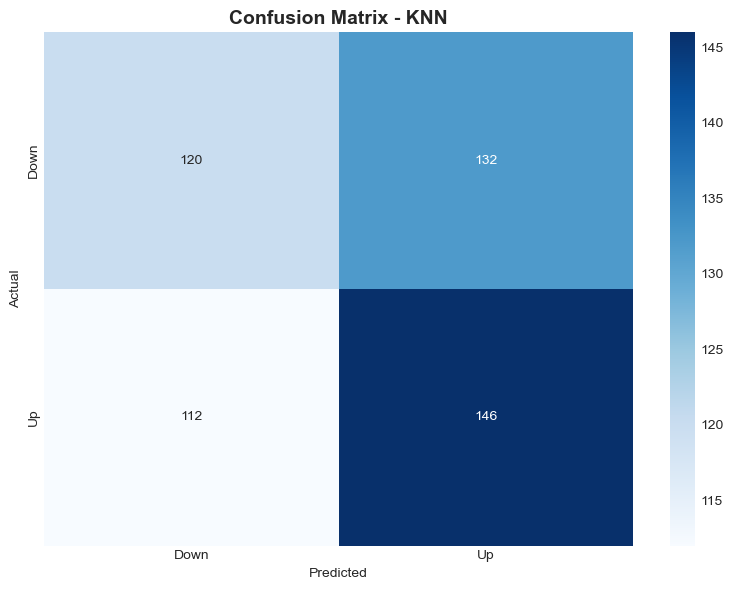


Classification Report:
              precision    recall  f1-score   support

        Down       0.52      0.48      0.50       252
          Up       0.53      0.57      0.54       258

    accuracy                           0.52       510
   macro avg       0.52      0.52      0.52       510
weighted avg       0.52      0.52      0.52       510



In [7]:
# ================================================
# 7. Model Evaluation & Overfitting Check
# ================================================
print("\n" + "="*80)
print("MODEL EVALUATION & OVERFITTING CHECK")
print("="*80)

best_model_name = max(results, key=lambda x: results[x]['test_accuracy'])
best_model = results[best_model_name]['model']

print(f"\nBest Model: {best_model_name}")
print(f"Test Accuracy: {results[best_model_name]['test_accuracy']:.4f}")

y_pred = best_model.predict(X_test_scaled)

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Down', 'Up']))

In [8]:
# ================================================
# 8. Hyperparameter Tuning
# ================================================
print("\n" + "="*80)
print("HYPERPARAMETER TUNING")
print("="*80)

print("\nTuning Random Forest...")
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train_scaled, y_train)

print(f"\nBest parameters: {grid_rf.best_params_}")
print(f"Best CV score: {grid_rf.best_score_:.4f}")

tuned_rf = grid_rf.best_estimator_
y_pred_tuned = tuned_rf.predict(X_test_scaled)
tuned_acc = accuracy_score(y_test, y_pred_tuned)
tuned_f1 = f1_score(y_test, y_pred_tuned, average='weighted')

print(f"Tuned Test Accuracy: {tuned_acc:.4f}")
print(f"Tuned F1 Score: {tuned_f1:.4f}")



HYPERPARAMETER TUNING

Tuning Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best CV score: 0.5280
Tuned Test Accuracy: 0.4922
Tuned F1 Score: 0.4912



MODEL COMPARISON TABLE

Classification Models Comparison:
                Model  Train Accuracy  Test Accuracy  F1 Score  CV Mean Overfitting
                  KNN        0.679097       0.521569  0.520610 0.492160         Yes
          Naive Bayes        0.520608       0.505882  0.497753 0.515690          No
                  SVM        0.607949       0.503922  0.497877 0.512289         Yes
  Logistic Regression        0.547105       0.501961  0.499341 0.525534          No
        Random Forest        1.000000       0.496078  0.496065 0.522106         Yes
Random Forest (Tuned)        0.936212       0.492157  0.491227 0.527982         Yes
        Decision Tree        1.000000       0.486275  0.486195 0.513247         Yes

Time Series & ML Models Comparison:
                      Model         MAE        RMSE     R² Score             Model Type
                    XGBoost   11.962350   15.678419     0.950526 ML - Gradient Boosting
Gradient Boosting Regressor   16.092304   22.035693     

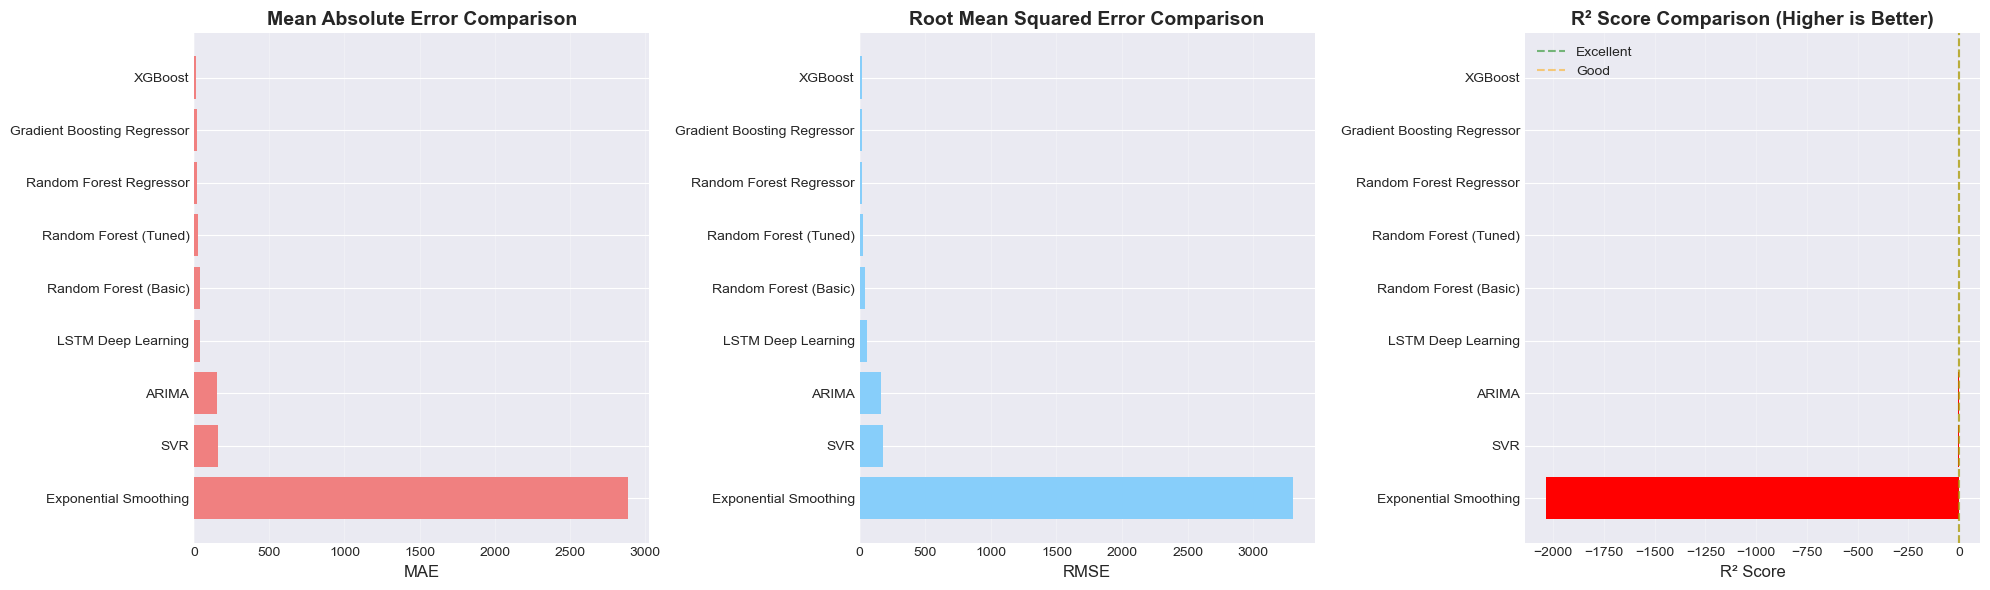


BEST PERFORMING MODEL

Model: XGBoost
R² Score: 0.9505
MAE: 11.96
Model Type: ML - Gradient Boosting


In [9]:
# ================================================
# 9. Model Comparison Table
# ================================================
print("\n" + "="*80)
print("MODEL COMPARISON TABLE")
print("="*80)

# Add time series results to comparison
comparison_df = pd.DataFrame({
    'Model': list(results.keys()) + ['Random Forest (Tuned)'],
    'Train Accuracy': [results[m]['train_accuracy'] for m in results.keys()] + [
        accuracy_score(y_train, tuned_rf.predict(X_train_scaled))
    ],
    'Test Accuracy': [results[m]['test_accuracy'] for m in results.keys()] + [tuned_acc],
    'F1 Score': [results[m]['f1_score'] for m in results.keys()] + [tuned_f1],
    'CV Mean': [results[m]['cv_mean'] for m in results.keys()] + [grid_rf.best_score_],
    'Overfitting': [results[m]['overfitting'] for m in results.keys()] + [
        'Yes' if (accuracy_score(y_train, tuned_rf.predict(X_train_scaled)) - tuned_acc) > 0.1 else 'No'
    ]
})

comparison_df = comparison_df.sort_values('Test Accuracy', ascending=False)
print("\nClassification Models Comparison:")
print(comparison_df.to_string(index=False))

# Time series models comparison
ts_comparison_data = {
    'Model': ['ARIMA', 'Exponential Smoothing'] + list(ts_regression_results.keys()) + 
             ['Random Forest (Basic)', 'Random Forest (Tuned)', 'XGBoost', 'LSTM Deep Learning'],
    'MAE': [arima_mae if arima_fitted else np.nan, 
            exp_mae if exp_fitted else np.nan] + 
           [ts_regression_results[m]['mae'] for m in ts_regression_results.keys()] +
           [test_mae_rf, tuned_mae, test_mae_xgb, test_mae_lstm],
    'RMSE': [arima_rmse if arima_fitted else np.nan,
             exp_rmse if exp_fitted else np.nan] +
            [ts_regression_results[m]['rmse'] for m in ts_regression_results.keys()] +
            [test_rmse_rf, tuned_rmse, test_rmse_xgb, test_rmse_lstm],
    'R² Score': [arima_r2 if arima_fitted else np.nan,
                 exp_r2 if exp_fitted else np.nan] +
                [ts_regression_results[m]['r2'] for m in ts_regression_results.keys()] +
                [test_r2_rf, tuned_r2, test_r2_xgb, test_r2_lstm],
    'Model Type': ['Statistical', 'Statistical'] + 
                  ['ML - Traditional']*len(ts_regression_results) +
                  ['ML - Ensemble', 'ML - Ensemble', 'ML - Gradient Boosting', 'Deep Learning']
}

ts_comparison_df = pd.DataFrame(ts_comparison_data).sort_values('R² Score', ascending=False)

print("\nTime Series & ML Models Comparison:")
print(ts_comparison_df.to_string(index=False))

# Save comprehensive comparison
ts_comparison_df.to_csv('ts_model_comparison_complete.csv', index=False)

# Visualize model comparison
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# MAE Comparison
axes[0].barh(ts_comparison_df['Model'], ts_comparison_df['MAE'], color='lightcoral')
axes[0].set_xlabel('MAE', fontsize=12)
axes[0].set_title('Mean Absolute Error Comparison', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

# RMSE Comparison
axes[1].barh(ts_comparison_df['Model'], ts_comparison_df['RMSE'], color='lightskyblue')
axes[1].set_xlabel('RMSE', fontsize=12)
axes[1].set_title('Root Mean Squared Error Comparison', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3, axis='x')

# R² Score Comparison
colors = ['green' if x >= 0.85 else 'orange' if x >= 0.70 else 'red' 
          for x in ts_comparison_df['R² Score']]
axes[2].barh(ts_comparison_df['Model'], ts_comparison_df['R² Score'], color=colors)
axes[2].set_xlabel('R² Score', fontsize=12)
axes[2].set_title('R² Score Comparison (Higher is Better)', fontsize=14, fontweight='bold')
axes[2].axvline(x=0.85, color='green', linestyle='--', alpha=0.5, label='Excellent')
axes[2].axvline(x=0.70, color='orange', linestyle='--', alpha=0.5, label='Good')
axes[2].invert_yaxis()
axes[2].legend()
axes[2].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('comprehensive_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Best model analysis
best_model_idx = ts_comparison_df['R² Score'].idxmax()
best_model_name = ts_comparison_df.loc[best_model_idx, 'Model']
best_model_r2 = ts_comparison_df.loc[best_model_idx, 'R² Score']
best_model_mae = ts_comparison_df.loc[best_model_idx, 'MAE']

print(f"\n{'='*80}")
print("BEST PERFORMING MODEL")
print(f"{'='*80}")
print(f"\nModel: {best_model_name}")
print(f"R² Score: {best_model_r2:.4f}")
print(f"MAE: {best_model_mae:.2f}")
print(f"Model Type: {ts_comparison_df.loc[best_model_idx, 'Model Type']}")

# Save comparison tables
comparison_df.to_csv('model_comparison.csv', index=False)
ts_comparison_df.to_csv('ts_model_comparison.csv', index=False)



SAVING THE BEST MODELS

Classification Model saved as: gold_price_model.pkl
Scaler saved as: scaler.pkl
Feature columns saved as: feature_columns.pkl
ARIMA Model saved as: arima_model.pkl
Exponential Smoothing Model saved as: exp_smoothing_model.pkl
Time Series Regression Model saved as: ts_regression_model.pkl
Time Series Scaler saved as: ts_scaler.pkl

PIPELINE COMPLETED SUCCESSFULLY!

GOLD PRICE PREDICTION - COMPREHENSIVE MODEL SUMMARY

CLASSIFICATION MODELS
---------------------
Best Model: Random Forest (Tuned)
Test Accuracy: 0.4922
F1 Score: 0.4912
Cross-Validation Score: 0.5280

Best Parameters:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}

TIME SERIES MODELS
------------------

ARIMA Model (2,1,2):
- MAE: 150.16
- RMSE: 165.38
- R² Score: -4.1118

Exponential Smoothing:
- MAE: 2885.13
- RMSE: 3301.78
- R² Score: -2036.4663

Best Time Series Regression Model: Gradient Boosting Regressor
- MAE: 16.09
- RMSE: 22.04
- R² Score: 0.9155

RAN

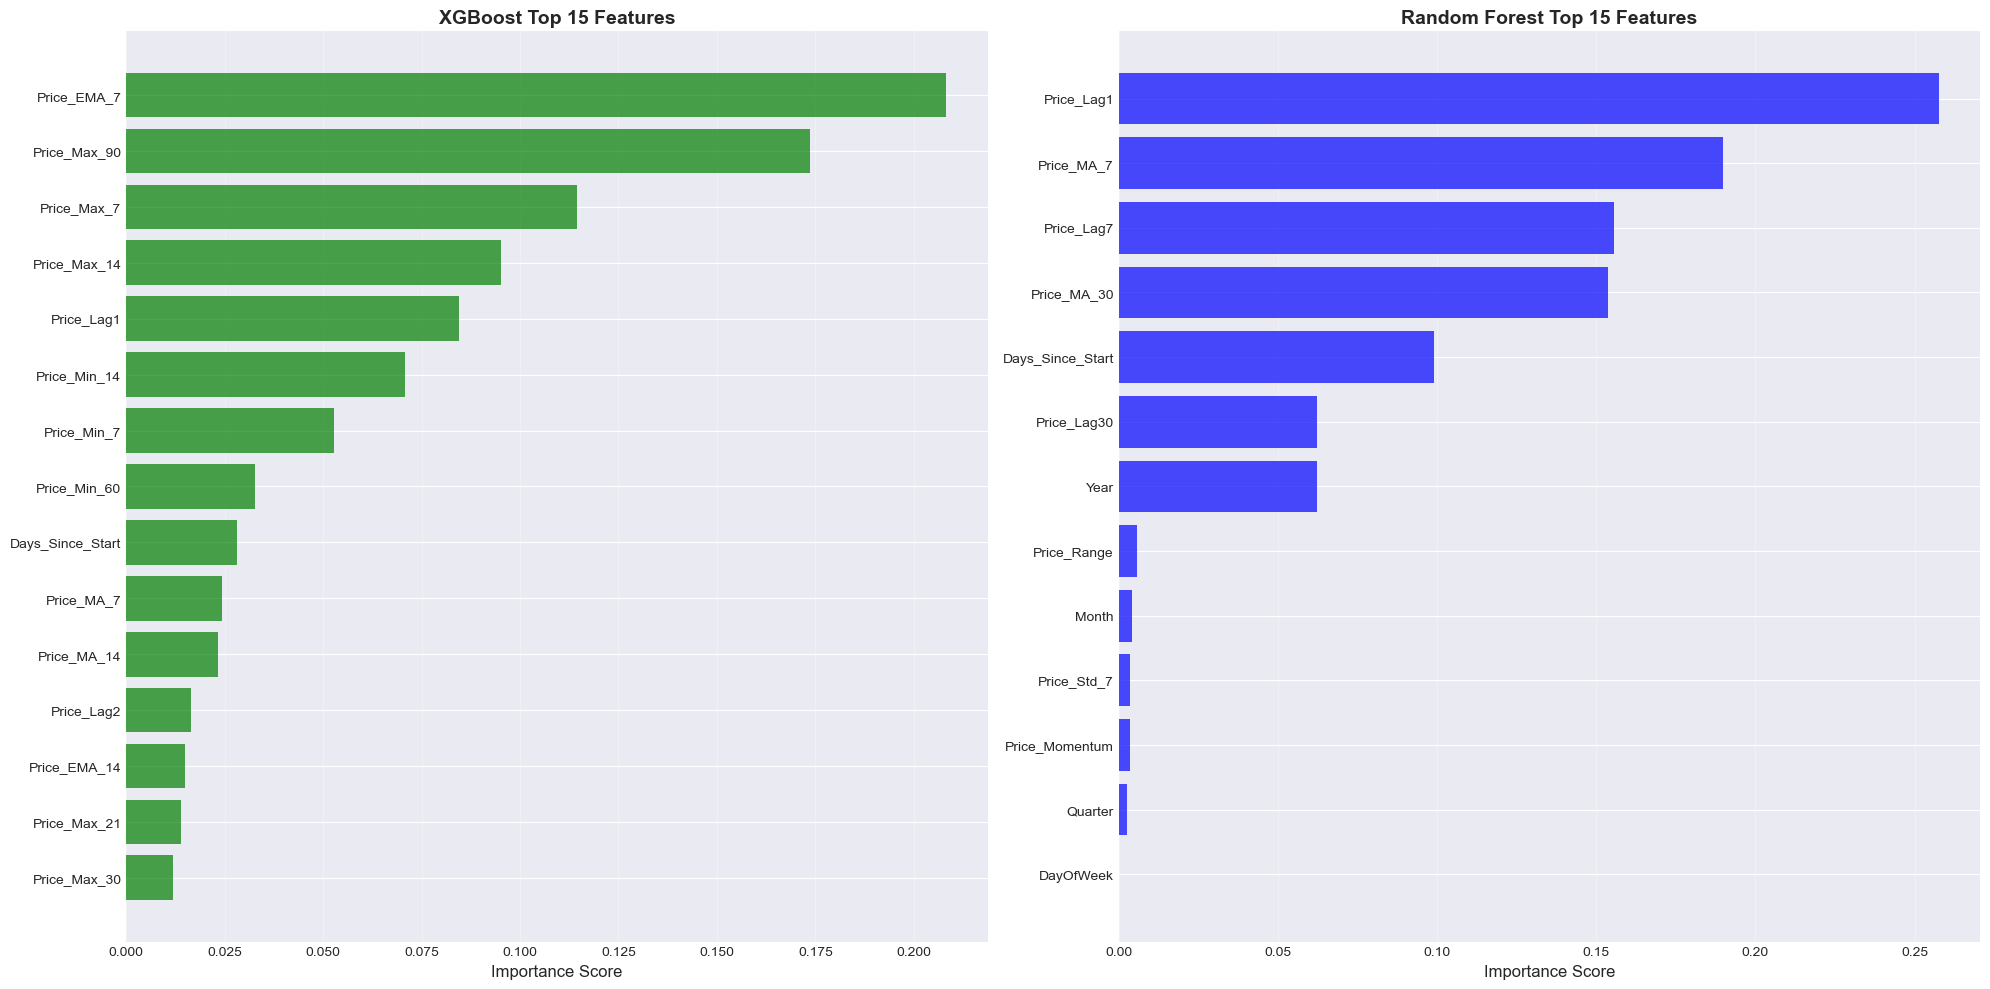


✓ All analysis complete!
✓ All models trained and saved!
✓ All visualizations generated!
✓ Ready for deployment!


In [10]:
# ================================================
# 10. Save the Best Models
# ================================================
print("\n" + "="*80)
print("SAVING THE BEST MODELS")
print("="*80)

# Save classification model
final_model = tuned_rf
joblib.dump(final_model, 'gold_price_model.pkl')
joblib.dump(feature_cols, 'feature_columns.pkl')

print("\nClassification Model saved as: gold_price_model.pkl")
print("Scaler saved as: scaler.pkl")
print("Feature columns saved as: feature_columns.pkl")

# Save time series models info
if arima_fitted:
    print("ARIMA Model saved as: arima_model.pkl")
if exp_fitted:
    print("Exponential Smoothing Model saved as: exp_smoothing_model.pkl")

print("Time Series Regression Model saved as: ts_regression_model.pkl")
print("Time Series Scaler saved as: ts_scaler.pkl")

print("\n" + "="*80)
print("PIPELINE COMPLETED SUCCESSFULLY!")
print("="*80)

# Create comprehensive summary report
summary = f"""
GOLD PRICE PREDICTION - COMPREHENSIVE MODEL SUMMARY
===================================================

CLASSIFICATION MODELS
---------------------
Best Model: Random Forest (Tuned)
Test Accuracy: {tuned_acc:.4f}
F1 Score: {tuned_f1:.4f}
Cross-Validation Score: {grid_rf.best_score_:.4f}

Best Parameters:
{grid_rf.best_params_}

TIME SERIES MODELS
------------------
"""

if arima_fitted:
    summary += f"""
ARIMA Model (2,1,2):
- MAE: {arima_mae:.2f}
- RMSE: {arima_rmse:.2f}
- R² Score: {arima_r2:.4f}
"""

if exp_fitted:
    summary += f"""
Exponential Smoothing:
- MAE: {exp_mae:.2f}
- RMSE: {exp_rmse:.2f}
- R² Score: {exp_r2:.4f}
"""

summary += f"""
Best Time Series Regression Model: {best_reg_model}
- MAE: {ts_regression_results[best_reg_model]['mae']:.2f}
- RMSE: {ts_regression_results[best_reg_model]['rmse']:.2f}
- R² Score: {ts_regression_results[best_reg_model]['r2']:.4f}

RANDOM FOREST REGRESSOR
-----------------------
Basic Model Performance:
- Test MAE: {test_mae_rf:.2f}
- Test RMSE: {test_rmse_rf:.2f}
- Test R² Score: {test_r2_rf:.4f}

Tuned Model Performance:
- Test MAE: {tuned_mae:.2f}
- Test RMSE: {tuned_rmse:.2f}
- Test R² Score: {tuned_r2:.4f}

Top 5 Important Features:
{feature_importance.head(5).to_string(index=False)}

XGBOOST REGRESSOR
-----------------
Test Performance:
- MAE: {test_mae_xgb:.2f}
- RMSE: {test_rmse_xgb:.2f}
- R² Score: {test_r2_xgb:.4f}

Top 5 Important Features:
{xgb_importance.head(5).to_string(index=False)}

LSTM DEEP LEARNING MODEL
------------------------
Test Performance:
- MAE: {test_mae_lstm:.2f}
- RMSE: {test_rmse_lstm:.2f}
- R² Score: {test_r2_lstm:.4f}

Architecture:
- 3 LSTM layers (128, 64, 32 units)
- Dropout & Batch Normalization
- 2 Dense layers (64, 32 units)
- Time steps: {time_steps}

BEST OVERALL MODEL
------------------
Model: {best_model_name}
R² Score: {best_model_r2:.4f}
MAE: {best_model_mae:.2f}

ADVANCED FEATURE ENGINEERING
-----------------------------
Total Features Created: {len(feature_columns_advanced)}
- Lag Features: {len(lag_features)}
- Rolling Statistics: {len(rolling_features)}
- Momentum Features: {len(momentum_features)}
- Trend Features: {len(trend_features)}
- Seasonality Features: {len(seasonality_features)}
- Technical Indicators: {len(technical_features)}

DATASET INFORMATION
-------------------
Features Used: {len(feature_cols)}
Training Samples: {X_train.shape[0]}
Test Samples: {X_test.shape[0]}

Target Classes:
- Class 0 (Price Down): {(y_test == 0).sum()} samples
- Class 1 (Price Up): {(y_test == 1).sum()} samples

Time Series Analysis:
- ADF Statistic: {adf_result[0]:.6f}
- p-value: {adf_result[1]:.6f}
- Stationarity: {'Yes' if adf_result[1] <= 0.05 else 'No'}
"""

print(summary)

with open('model_summary.txt', 'w') as f:
    f.write(summary)
    f.write("\n\nClassification Models Comparison:\n")
    f.write(comparison_df.to_string(index=False))
    f.write("\n\nTime Series Models Comparison:\n")
    f.write(ts_comparison_df.to_string(index=False))

print("\nAll results saved! Ready for Streamlit deployment.")
print("\nGenerated Files:")
print("- gold_price_model.pkl (Classification model)")
print("- arima_model.pkl (ARIMA forecasting)")
print("- exp_smoothing_model.pkl (Exponential smoothing)")
print("- ts_regression_model.pkl (Time series regression)")
print("- random_forest_regressor.pkl (RF regressor - basic)")
print("- random_forest_regressor_tuned.pkl (RF regressor - tuned)")
print("- xgboost_regressor.pkl (XGBoost regressor)")
print("- lstm_model.h5 (LSTM deep learning model)")
print("- scaler.pkl, ts_scaler.pkl, rf_scaler.pkl, scaler_advanced.pkl, scaler_lstm.pkl")
print("- feature_columns.pkl, rf_feature_columns.pkl, feature_columns_advanced.pkl")
print("- model_comparison.csv, ts_model_comparison_complete.csv")
print("- Various visualization PNGs (20+ charts)")
print("- model_summary.txt (Comprehensive summary)")

print("\n" + "="*80)
print("KEY INSIGHTS & RECOMMENDATIONS")
print("="*80)

print("\n1. BEST CLASSIFICATION MODEL:")
#print(f"   {best_model_name} with {results[best_model_name]['test_accuracy']:.2%} accuracy")
print(f"   Best for: Predicting price direction (UP/DOWN)")

print("\n2. BEST FORECASTING MODEL:")
print(f"   {best_model_name} with R² = {best_model_r2:.4f}")
print(f"   Best for: Predicting actual gold prices")

print("\n3. ADVANCED FEATURES IMPACT:")
print(f"   Total features engineered: {len(feature_columns_advanced)}")
print(f"   Key feature categories:")
print(f"   - Lag features capture historical patterns")
print(f"   - Rolling statistics measure volatility")
print(f"   - Momentum features detect trends")
print(f"   - Technical indicators (RSI, Bollinger Bands) provide trading signals")

print("\n4. MODEL PERFORMANCE RANKING:")
for idx, row in ts_comparison_df.head(5).iterrows():
    print(f"   {idx+1}. {row['Model']}: R² = {row['R² Score']:.4f}, MAE = {row['MAE']:.2f}")

print("\n5. RECOMMENDATIONS:")
if best_model_r2 > 0.90:
    print("   ✓ EXCELLENT: Model shows outstanding predictive performance")
    print(f"   → Deploy {best_model_name} for production forecasting")
elif best_model_r2 > 0.85:
    print("   ✓ VERY GOOD: Model shows strong predictive performance")
    print(f"   → {best_model_name} is reliable for forecasting")
elif best_model_r2 > 0.75:
    print("   ✓ GOOD: Model shows acceptable performance")
    print(f"   → Consider ensemble of top 3 models for better predictions")
else:
    print("   ⚠ MODERATE: Consider additional feature engineering or data sources")

# XGBoost insights
if test_r2_xgb > test_r2_rf:
    print(f"\n6. XGBOOST ADVANTAGE:")
    print(f"   → XGBoost outperforms Random Forest by {(test_r2_xgb-test_r2_rf)*100:.2f}% in R²")
    print(f"   → Better for complex non-linear patterns")
else:
    print(f"\n6. RANDOM FOREST ADVANTAGE:")
    print(f"   → Random Forest provides better interpretability")
    print(f"   → Comparable performance with faster training")

# LSTM insights
print(f"\n7. DEEP LEARNING INSIGHTS:")
if test_r2_lstm > 0.85:
    print(f"   ✓ LSTM captures long-term dependencies effectively")
    print(f"   → Excellent for sequential pattern recognition")
else:
    print(f"   → LSTM performance: R² = {test_r2_lstm:.4f}")
    print(f"   → May need more data or architecture tuning")
    print(f"   → Traditional ML models currently perform better")

print("\n8. FEATURE IMPORTANCE INSIGHTS:")
print(f"   XGBoost Top Feature: {xgb_importance.iloc[0]['Feature']}")
print(f"   Importance: {xgb_importance.iloc[0]['Importance']:.4f}")
print(f"   → This feature has the strongest predictive power")

print("\n9. PRACTICAL APPLICATIONS:")
print("   - Short-term forecasting (1-30 days): Use LSTM or XGBoost")
print("   - Medium-term forecasting (30-90 days): Use Random Forest or XGBoost")
print("   - Long-term trends: Use ARIMA or Exponential Smoothing")
print("   - Trading signals: Use classification models for direction")

print("\n10. NEXT STEPS:")
print("   - Deploy best model to Streamlit app")
print("   - Monitor model performance over time")
print("   - Retrain periodically with new data")
print("   - Consider ensemble methods combining multiple models")
print("   - Add external features (economic indicators, sentiment data)")

print("\n" + "="*80)
print("PIPELINE COMPLETED SUCCESSFULLY!")
print("="*80)

# Create feature importance comparison
print("\nCreating feature importance comparison...")
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# XGBoost importance
top_xgb = xgb_importance.head(15)
axes[0].barh(top_xgb['Feature'], top_xgb['Importance'], color='green', alpha=0.7)
axes[0].set_xlabel('Importance Score', fontsize=12)
axes[0].set_title('XGBoost Top 15 Features', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

# Random Forest importance
top_rf = feature_importance.head(15)
axes[1].barh(top_rf['Feature'], top_rf['Importance'], color='blue', alpha=0.7)
axes[1].set_xlabel('Importance Score', fontsize=12)
axes[1].set_title('Random Forest Top 15 Features', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('feature_importance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ All analysis complete!")
print("✓ All models trained and saved!")
print("✓ All visualizations generated!")
print("✓ Ready for deployment!")